<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Project 3 : EasyVisa</font></center>

## Problem Statement

### Business Context


Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.


### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

**Data Dictionary**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied


## Importing the necessary libraries

In [114]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpecFromSubplotSpec # Import for nested grids

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# lib for respective models

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# To oversample and undersample data

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# lib for metrics evaluation

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import GridSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv"
customer_data = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
# copying data to another variable to avoid any changes to original data
data = customer_data.copy()

## Overview of the dataset

### Understand the shape of the dataset.

In [4]:
data.shape

(25480, 12)

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Checking for missing values

In [8]:
# checking for null values
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


### Dropping the duplicate values

In [9]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

### Statistical summary of the data



**Let's check the statistical summary of the data.**

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [11]:
data.loc[data['no_of_employees'] < 0].head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


In [12]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [13]:
data["no_of_employees"] = abs(data["no_of_employees"])

In [14]:
categorical_cols = list(data.select_dtypes("object").columns)
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']))
target = 'case_status'

In [15]:
for item in categorical_cols:
  print(100*data[item].value_counts(dropna = False)/data[item].shape[0])
  print('-' * 50)

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: count, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: count, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: count, dtype: float64
--------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: count, dtype: float64
--------------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: count, dtype: floa

### Dropping the columns with all unique values

In [16]:
data.case_id.nunique()

25480

In [17]:
data = data.drop(["case_id"], axis=1)

In [18]:
categorical_cols = list(data.select_dtypes("object").columns)

### Observations


* The dataset contains 25480 rows with 12 columns.
* The dataset has no duplicate records or duplicate customer IDs.
* All columns in the dataset have a value count of 25480, indicating that there are no missing values.
* The column ID contains case IDs with all unique values and also, it is not very relevant for our analysis. Hence, it was dropped as it will not be used during the analysis.
* the no_of_employees column contains negative values, suspect that it could be because of the data entry issue. Hence, have converted the negative value to positive
* The columns has_job_experience, requires_job_training, and full_time_position contains 2 unique values:
0 - No
1 - Yes
* The other columns contains unique values accordingly

**Statistical observation:**
* the no_of_employees column contains negative values, suspect that it could be because of the data entry issue. Hence, have converted the negative value to positive
* the no_of_employee column follows right skewed distribution
* The column yr_of_estab is following left skewed distribution
* The column prevailing_wages has a min of 2$ which was very anomalous, but on further checking, the unit_of_wages should be considered along with the prevailing wages
* the prevailing_wages follows normal distribution




## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **ED Functions**

In [19]:
def plot_histogram_boxplot(data, features, figsize=(16, 12), kde=False, bins=None):
    """
    Generates a grid of combined boxplots and histograms.

    data: pandas DataFrame
    features: A single column name (string) or a list of column names
    figsize: Overall size of the figure
    kde: Whether to show the density curve on histograms
    bins: Number of bins for histograms
    """
    if not isinstance(features, list):
        features = [features]

    n_features = len(features)
    n_cols = min(n_features, 3)
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    axes = np.array(axes).flatten()

    for i, feature in enumerate(features):
        current_ax = axes[i]
        current_ax.set_axis_off()

        # FIX: Use GridSpecFromSubplotSpec for a robust nested grid
        sub_gs = GridSpecFromSubplotSpec(
            2, 1,
            subplot_spec=current_ax.get_subplotspec(),
            height_ratios=[0.25, 0.75],
            hspace=0
        )

        ax_box = fig.add_subplot(sub_gs[0])
        ax_hist = fig.add_subplot(sub_gs[1], sharex=ax_box)

        plt.setp(ax_box.get_xticklabels(), visible=False)

        # Plotting
        sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")
        ax_box.set_xlabel('')
        ax_box.set_title(f'Distribution of {feature}', weight='bold')

        plot_params = {'data': data, 'x': feature, 'kde': kde, 'ax': ax_hist}
        if bins:
            sns.histplot(**plot_params, bins=bins)
        else:
            sns.histplot(**plot_params)

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label=f"Mean: {data[feature].mean():.2f}")
        ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label=f"Median: {data[feature].median():.2f}")
        ax_hist.legend(loc="upper right")

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_axis_off()

    plt.show()

In [20]:
def show_pairplot(data, diag_kind = 'kde', height = 2, hue = None):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    diag_kind: str, optional
      The type of pairplot diagram, default: kde
    height: int, optional
      The plot size in inches, default: 2
    hue: str, optional
      To show the hue, default: None
  '''
  if hue:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height, hue = hue)
    ax.fig.suptitle('Relationship of Numerical Variables with regards to ' + hue, y = 1.005, size = 11)
  else:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height)
    ax.fig.suptitle('Relationship of Numerical Variables', y = 1.005, size = 11)

  plt.show()


In [21]:
def plot_labeled_barplots(data, features, perc=False, n=None, figsize=(20, 15)):
    """
    Generates a grid of bar plots with labels.

    data: pandas DataFrame
    features: A single column name (string) or a list of column names
    perc: Whether to display percentages instead of count (default is False)
    n: Displays the top n category levels (default is None, i.e., display all levels)
    figsize: Overall size of the figure for the grid
    """
    # Ensure 'features' is a list for consistent iteration
    if not isinstance(features, list):
        features = [features]

    # Calculate grid dimensions
    n_features = len(features)
    n_cols = min(n_features, 3)  # Max 3 columns for readability
    n_rows = int(np.ceil(n_features / n_cols))

    # Create the main figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    axes = np.array(axes).flatten()

    # Loop through each feature
    for i, feature in enumerate(features):
        ax = axes[i]
        total = len(data[feature])

        # Create the bar plot on the specified axis
        sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n],
            ax=ax,
        )

        ax.set_title(f"Distribution of {feature}", weight="bold")
        ax.tick_params(axis='x', labelrotation=90) # Rotate x-axis labels

        # Annotate each bar with count or percentage
        for p in ax.patches:
            if perc:
                label = f"{100 * p.get_height() / total:.1f}%"
            else:
                label = f"{p.get_height()}"

            ax.annotate(
                label,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                size=11,
                xytext=(0, 5),
                textcoords="offset points",
            )

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_axis_off()

    plt.show()

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

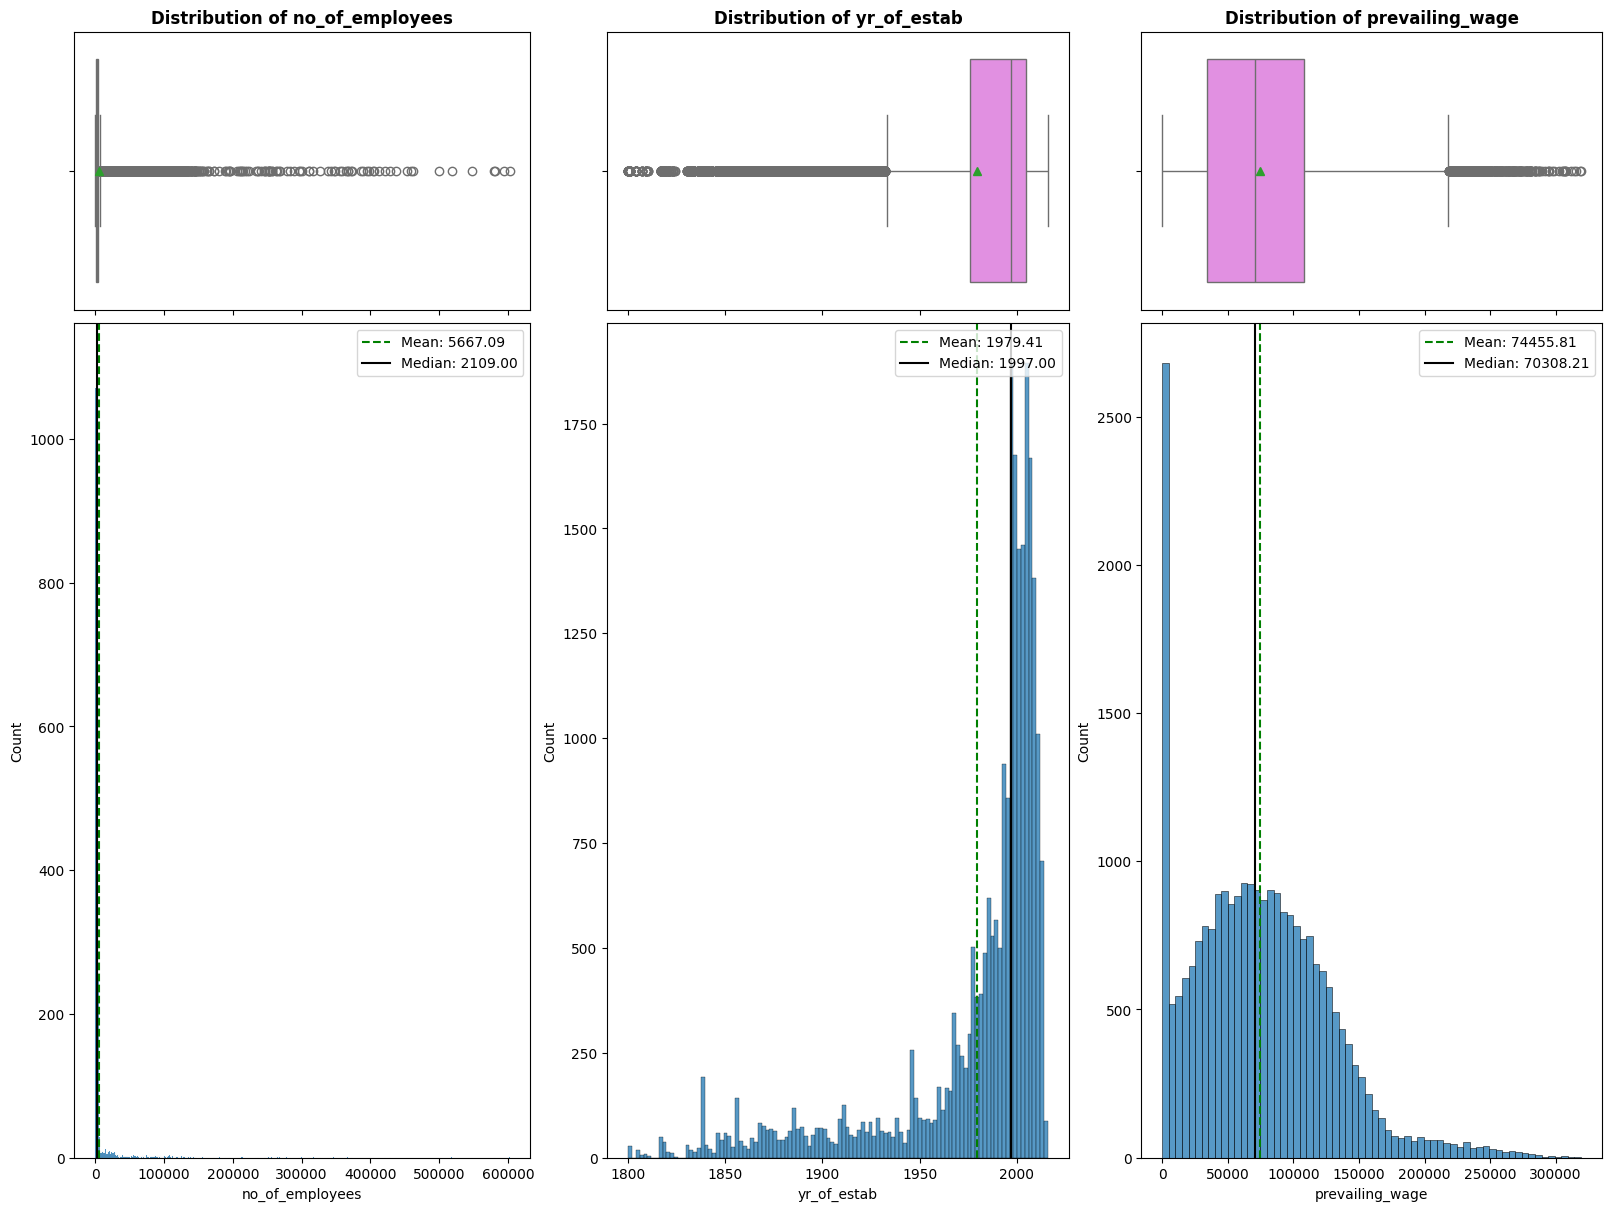

In [24]:
# outlier detection using boxplot
plot_histogram_boxplot(data, numeric_columns)

**Observation**

* As highlighted no_of_employees follows right skewed distribution, while no_of_employees has a high deviation and has a huge outlier
* prevailing_wages follows a normal distribution where the mean is close to the 50% percentile
* yr_of_estab is following left skewed distribution

Text(0.5, 1.0, "Boxplot for ['no_of_employees', 'yr_of_estab', 'prevailing_wage']")

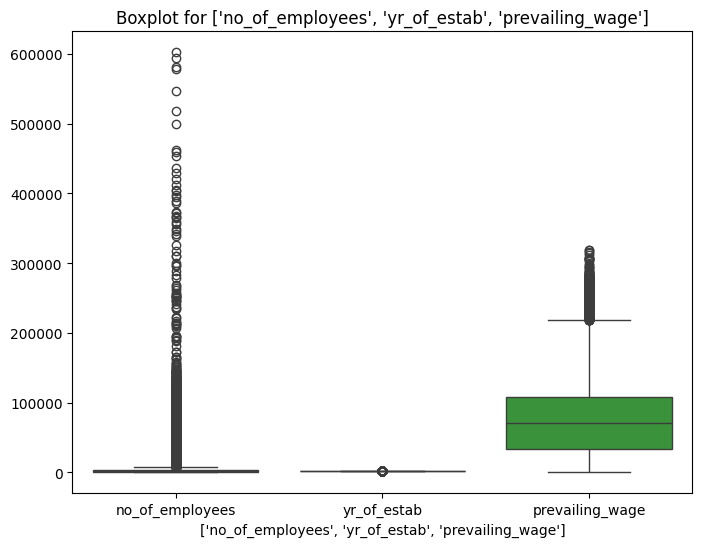

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numeric_columns])
plt.xlabel(numeric_columns)
plt.title(f'Boxplot for {numeric_columns}')

**Observation:**
* Prevailing wages has high medium when compared to other two numeric columns

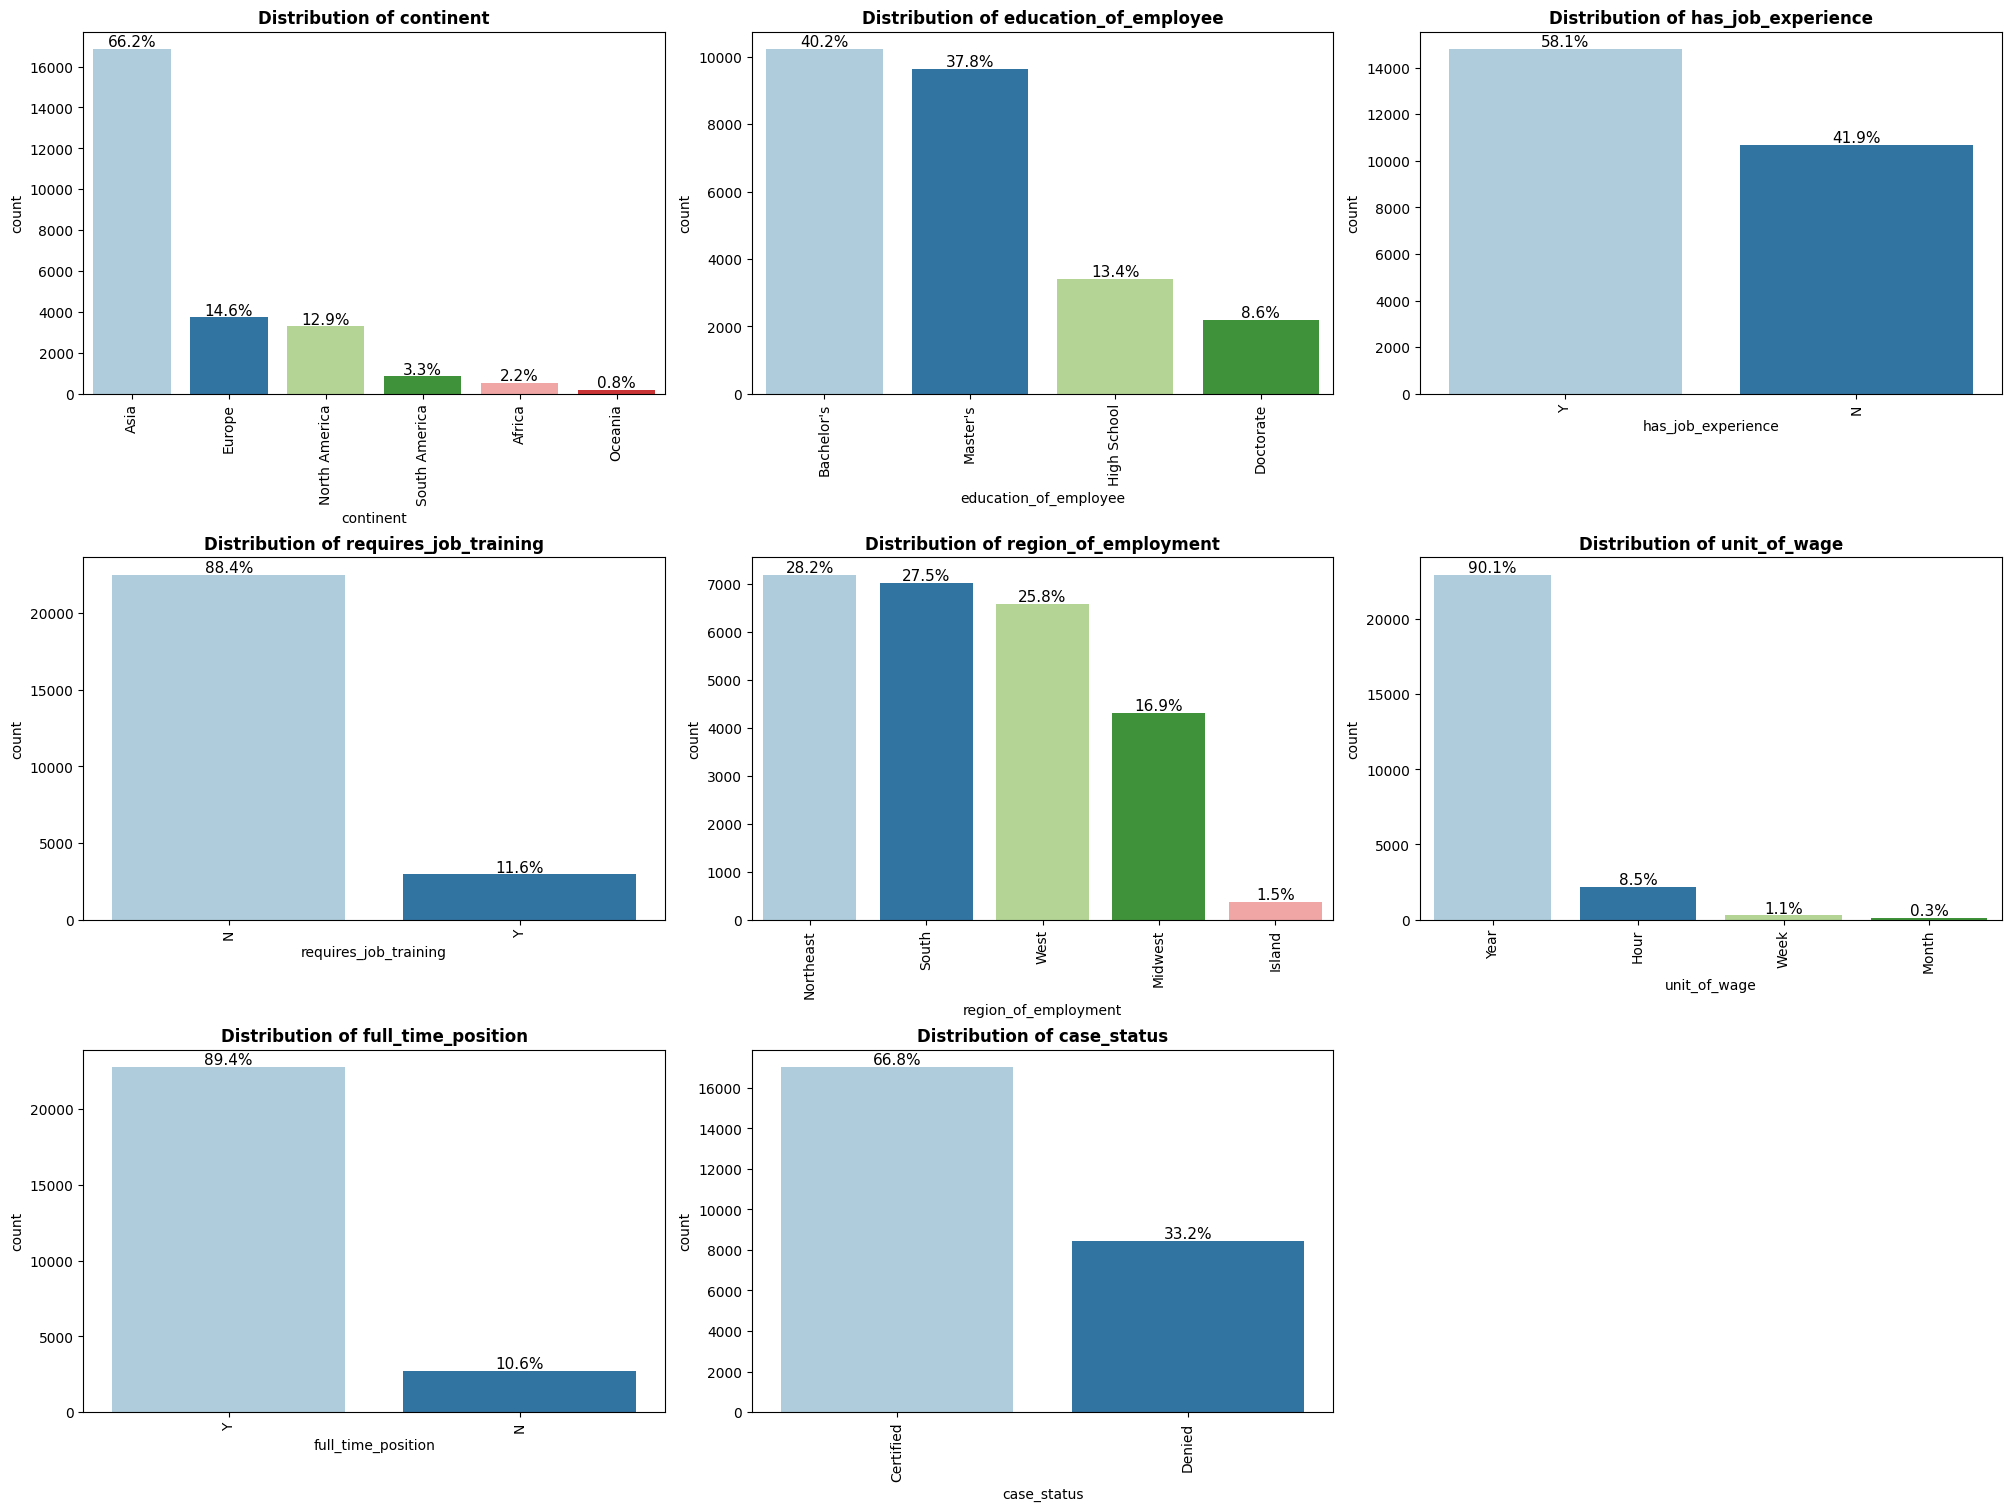

In [26]:
other_columns = categorical_cols

plot_labeled_barplots(data, other_columns, perc=True)

**Observation**

* Most of the applicants are from asia (more than half)
* Most of the applicants has the job experience and almost 90% of them requires training
* Northeast, South, and West have almost equal percentages of applicants. (25%-28%) The Island regions have only 1.5% of the applicants. The island could be an outlier
* Need to check why most of the applicants are granted visa? (Almost 70%)

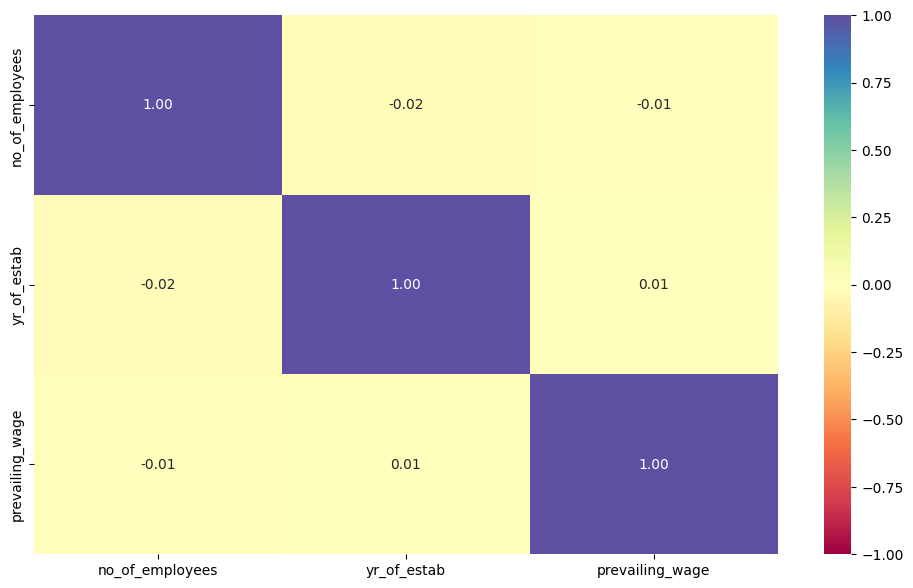

In [27]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**
* The correlation indicates a very weak relationship between all the numeric variables

### Bivariate Analysis

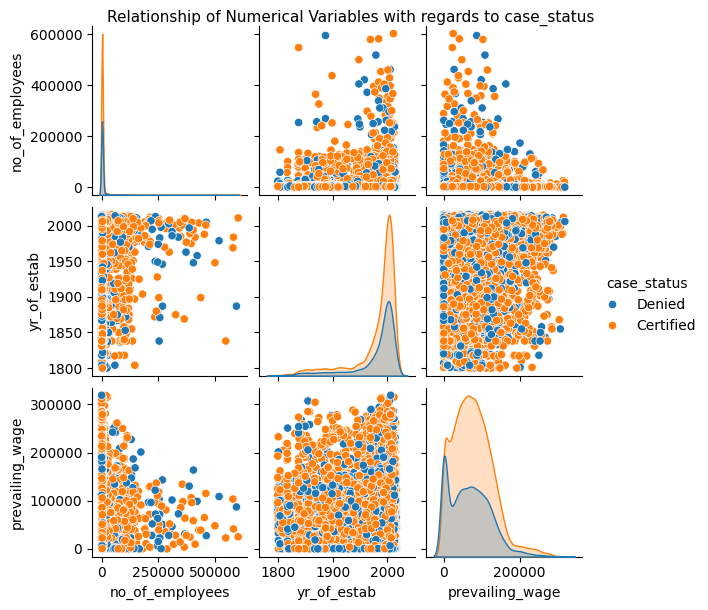

In [28]:
# Display the relationships of Numerical Variables with regards to Personal_Loan

show_pairplot(data = data[numeric_columns + [target]], hue = target)

**Observations:**
* As highlighted earlier, the correlation is very weak and also, the case_status is distributed


**Let's see how the target variable varies across main columns**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


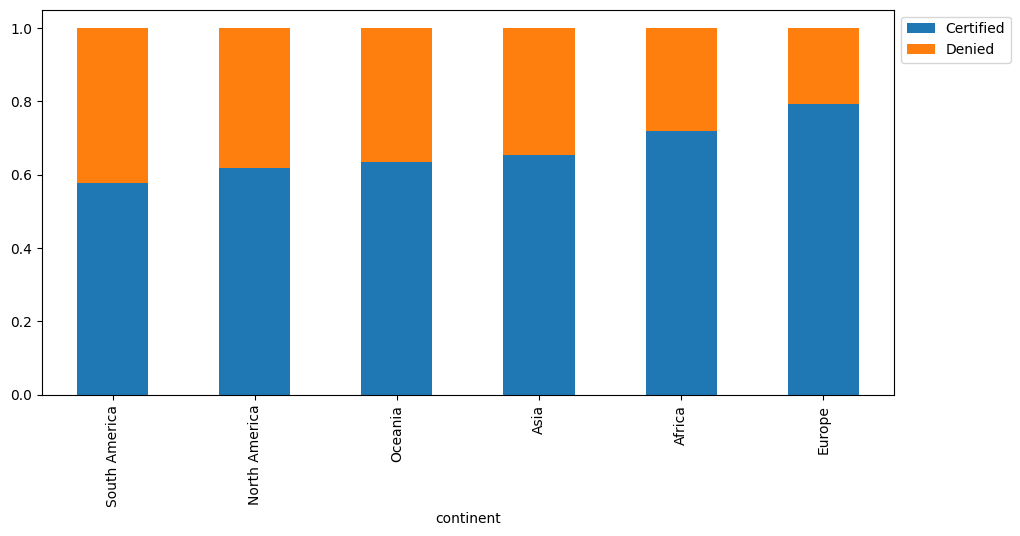

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


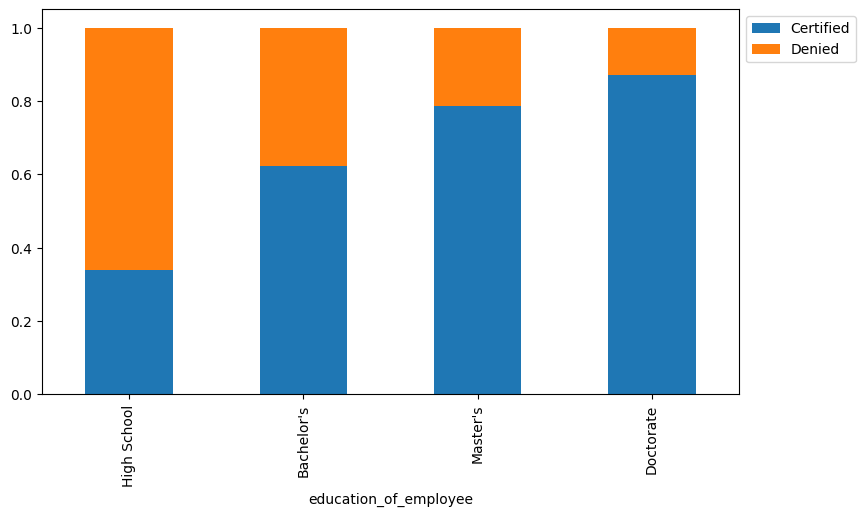

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


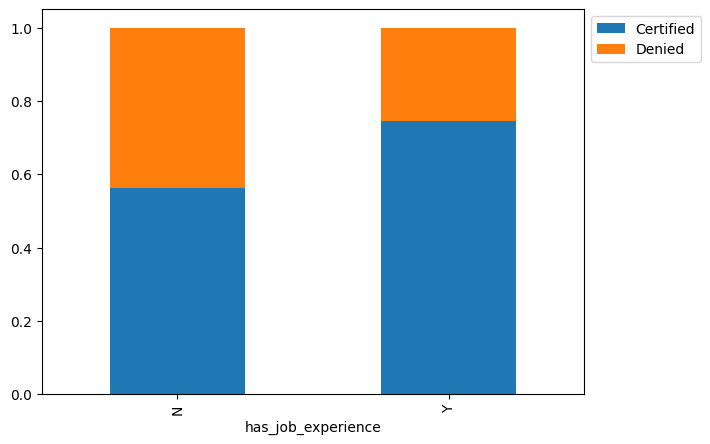

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


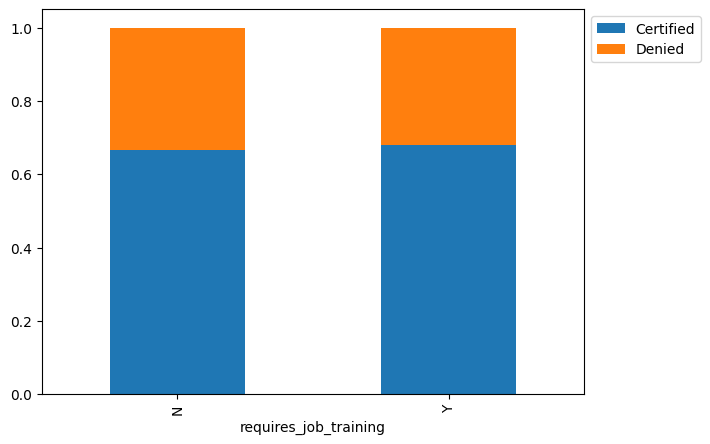

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


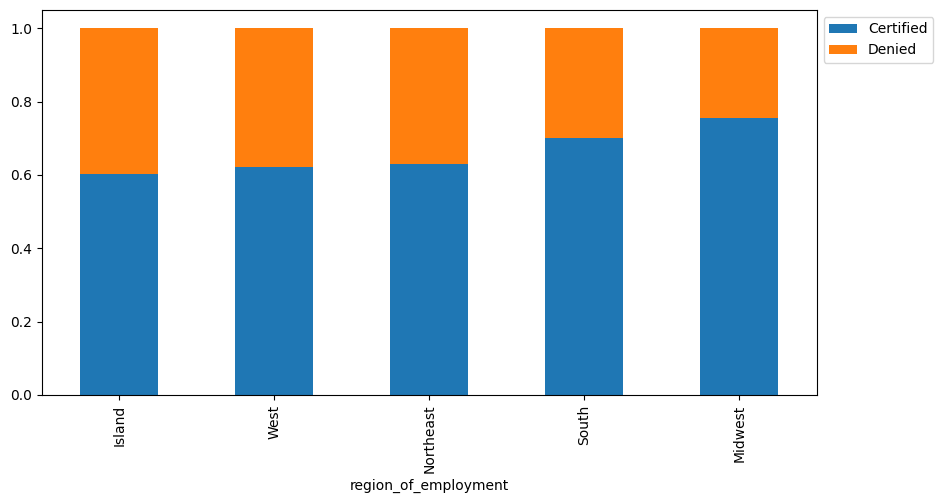

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


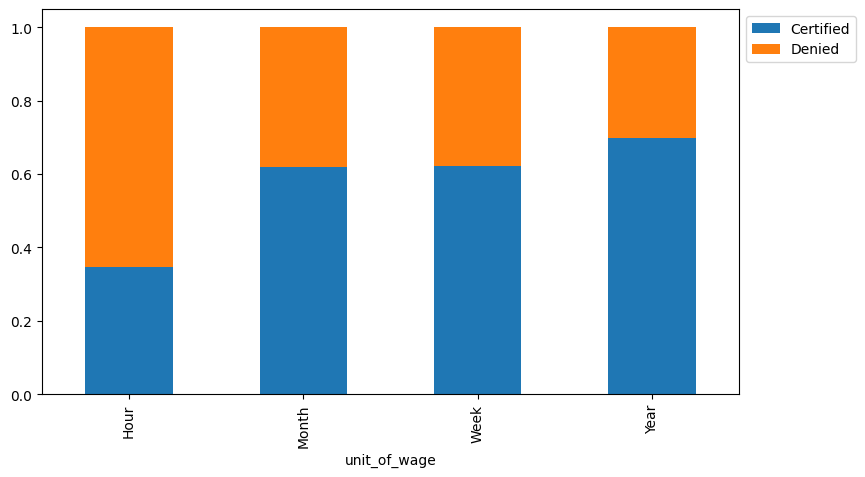

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


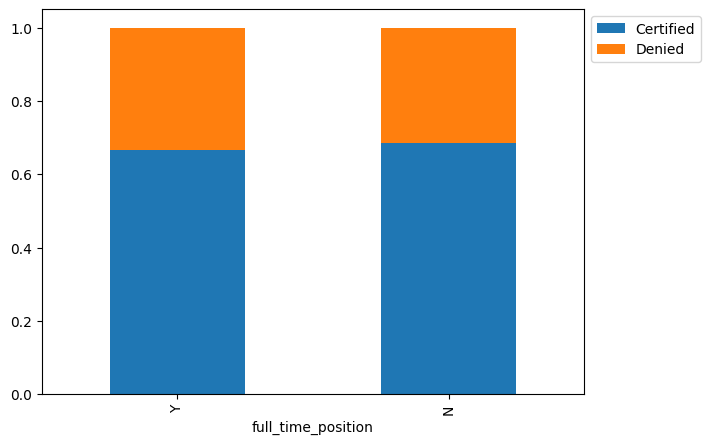

In [29]:
for i in categorical_cols:
  if i != target:
    stacked_barplot(data, i, target)

**Observation:**
* Applicants with job experience has higher chance of getting visa certified (74%), but about 56% of people who didnt have a job experience also got their visa certified
* Higher the qualification, higher the chance of getting certified
* requires job training and full_time_position doesnt play a much role
* region_of_employment is distributed across the category
* Yearly wages has higher chance of certificated, while month and week has the same distribution and the hour unit has the lower chance when compared to other units

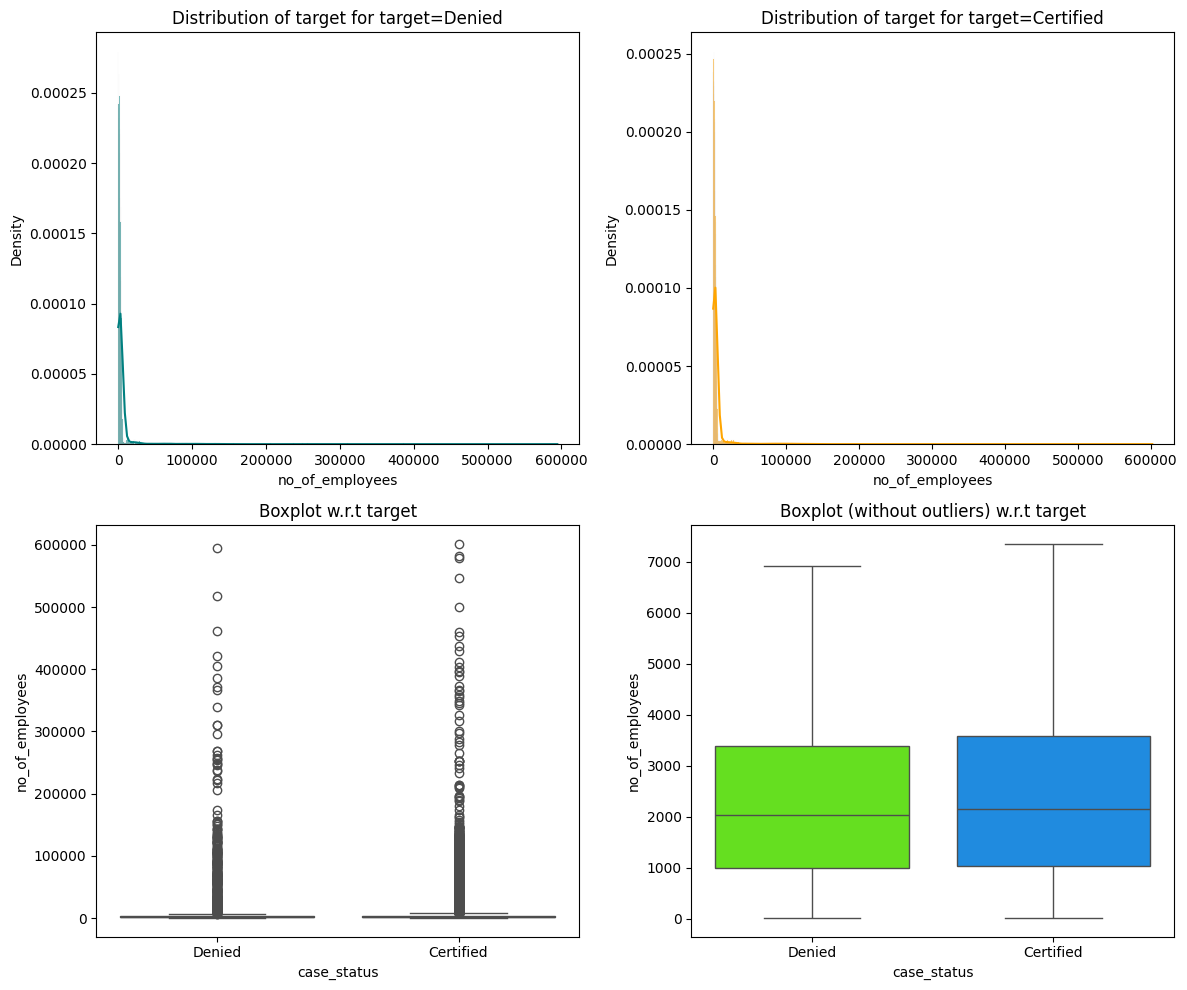

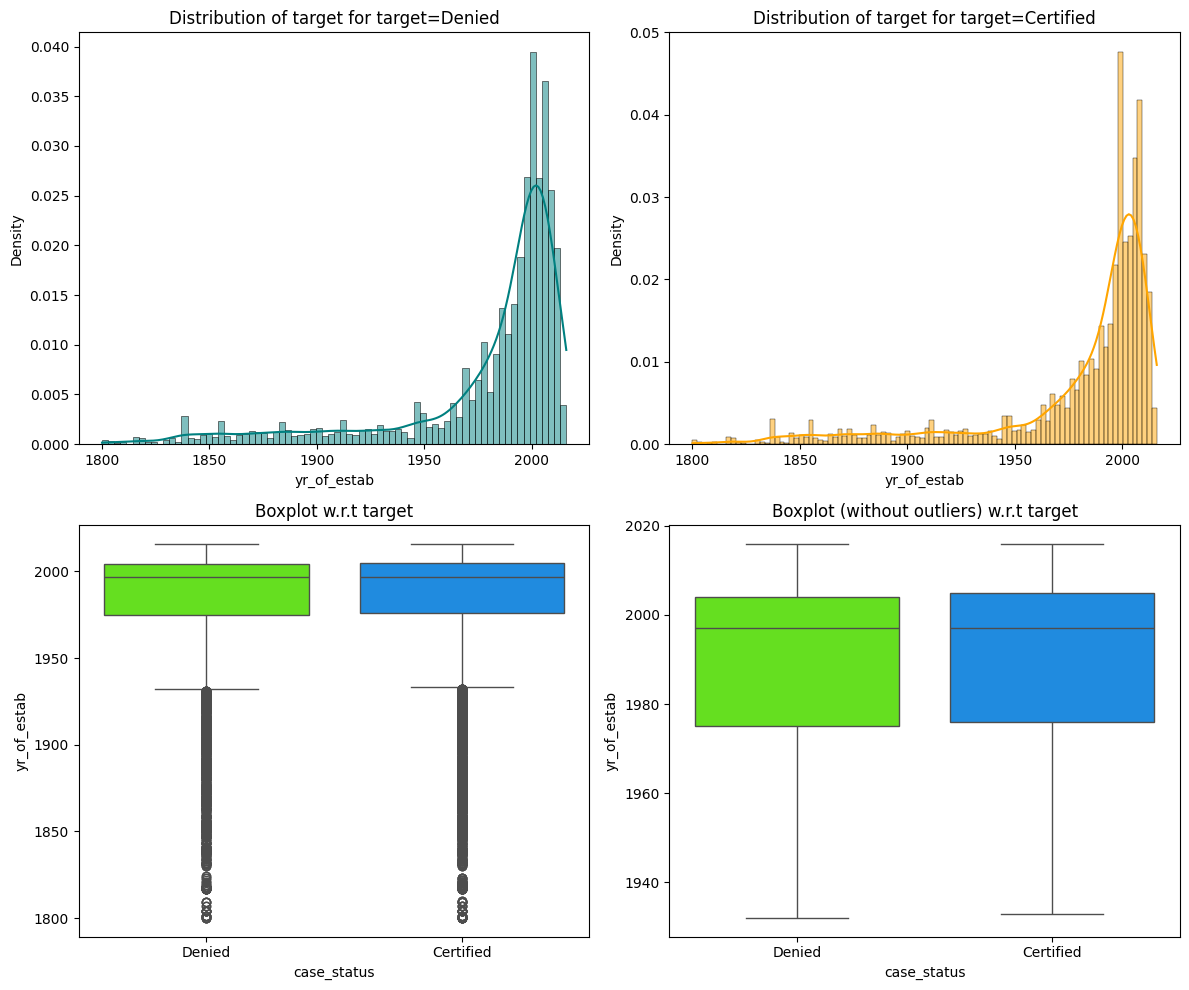

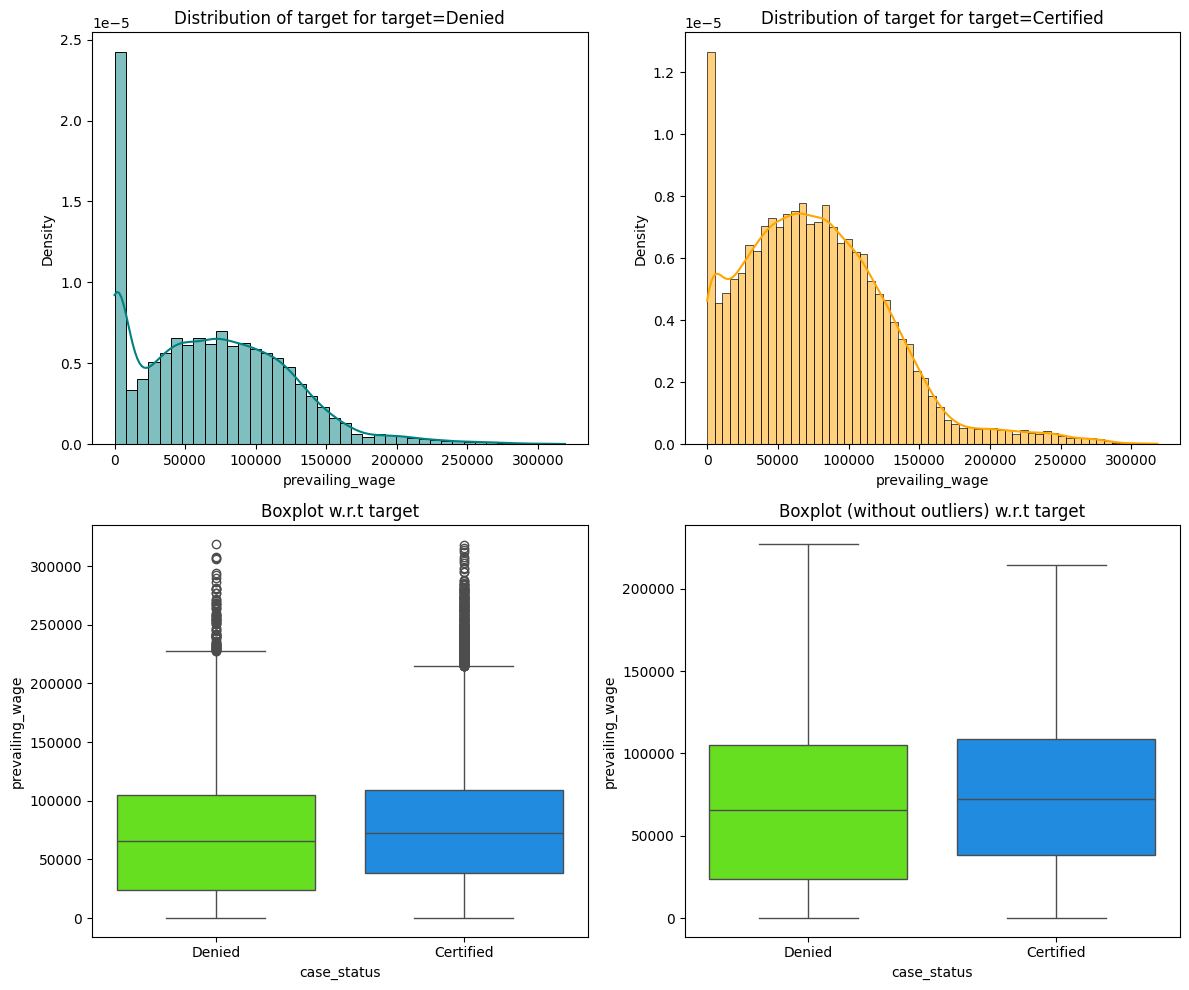

In [30]:
for i in numeric_columns:
  if i != target:
    distribution_plot_wrt_target(data, i, target)

**Observation:**
* The median wage for the certified applications is slightly higher than the denied application, but is the prevailing wage similar across all region.

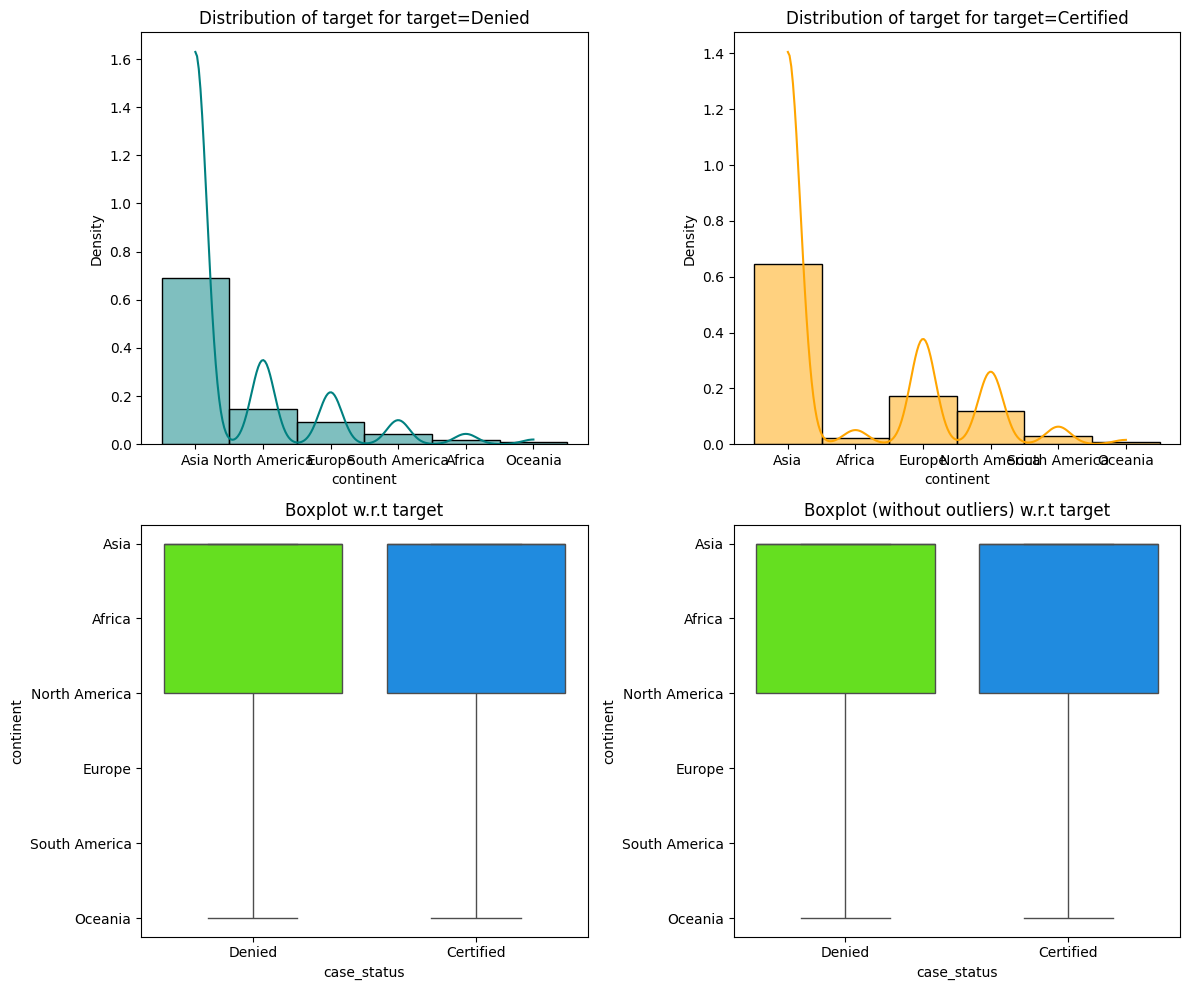

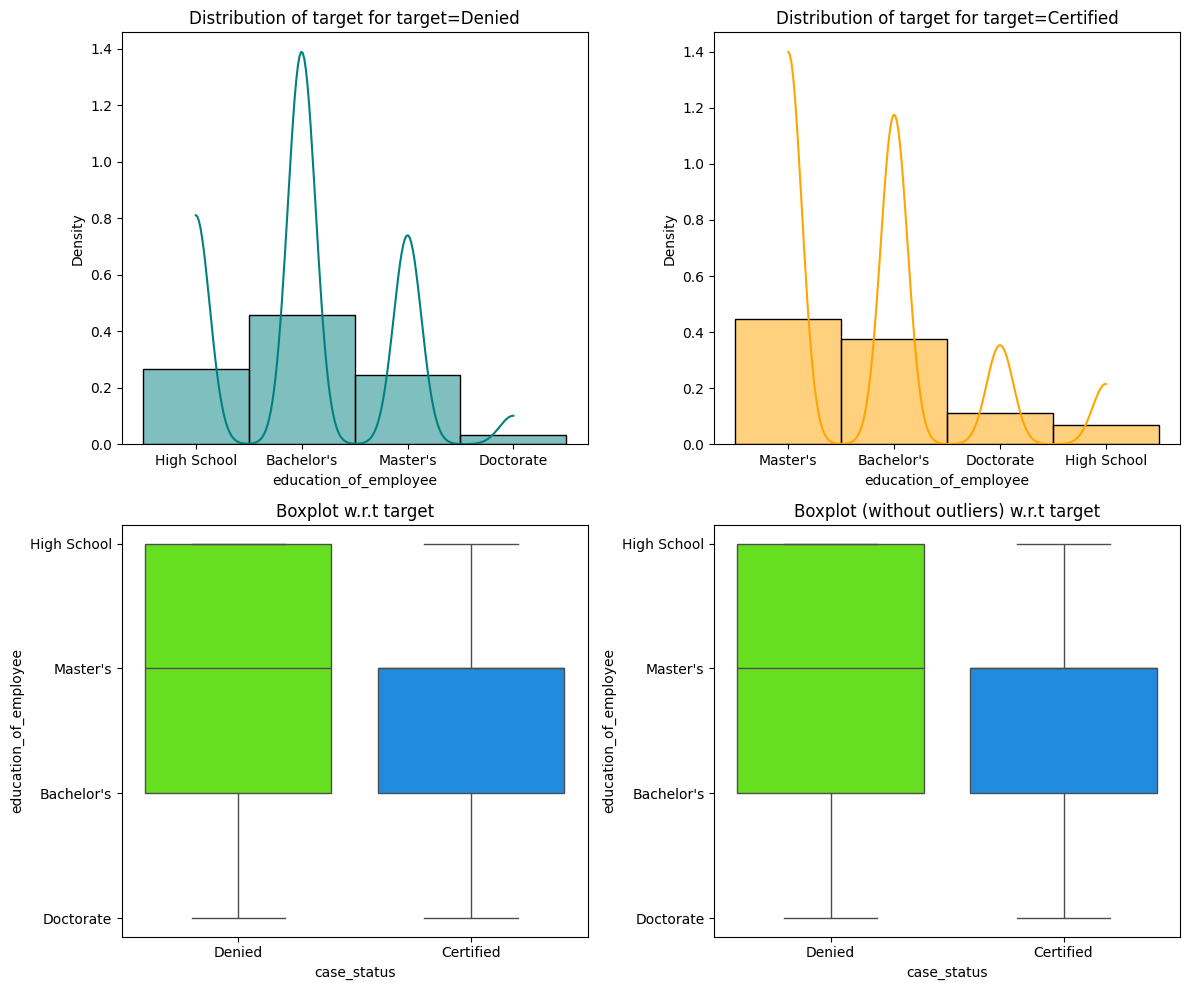

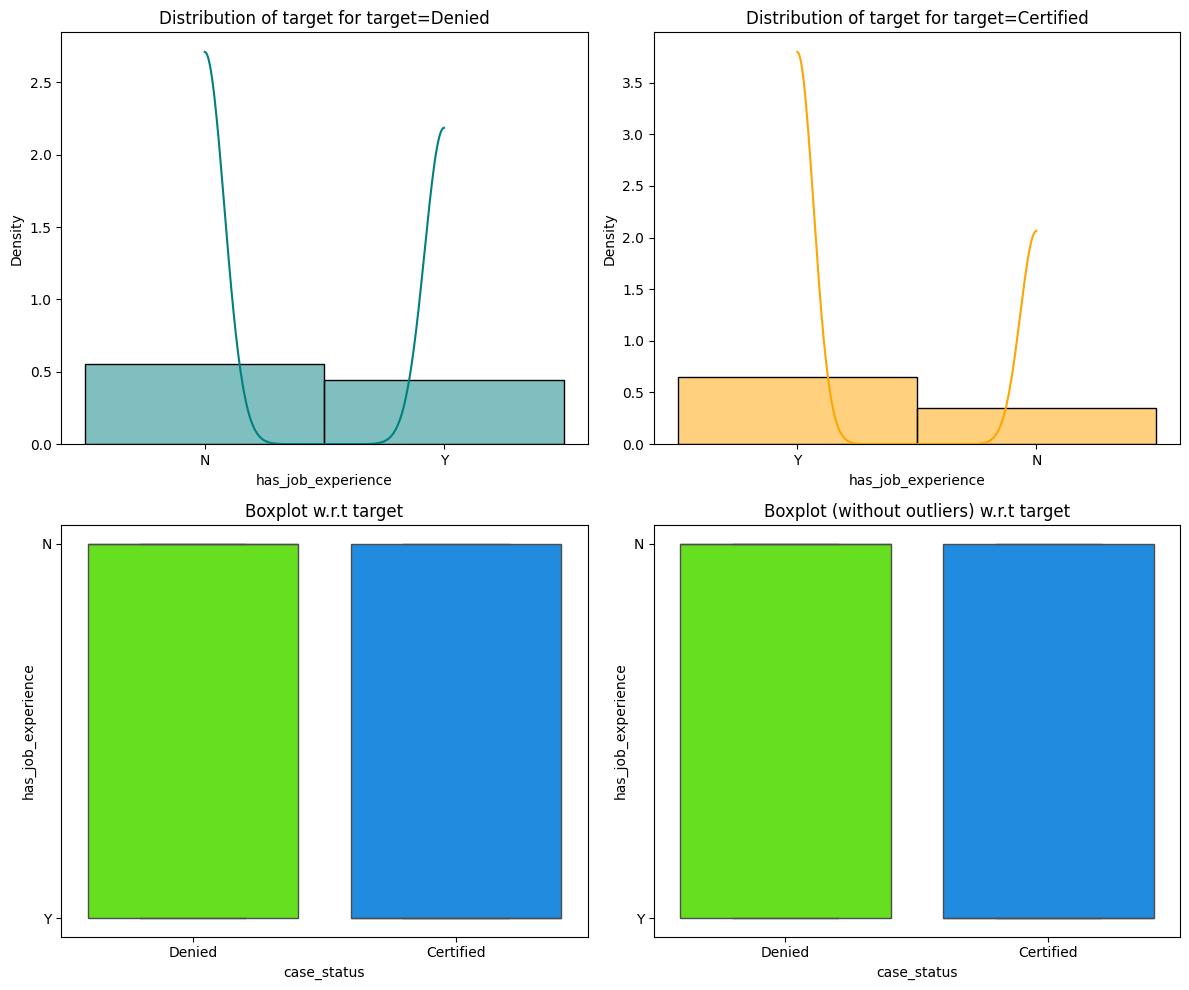

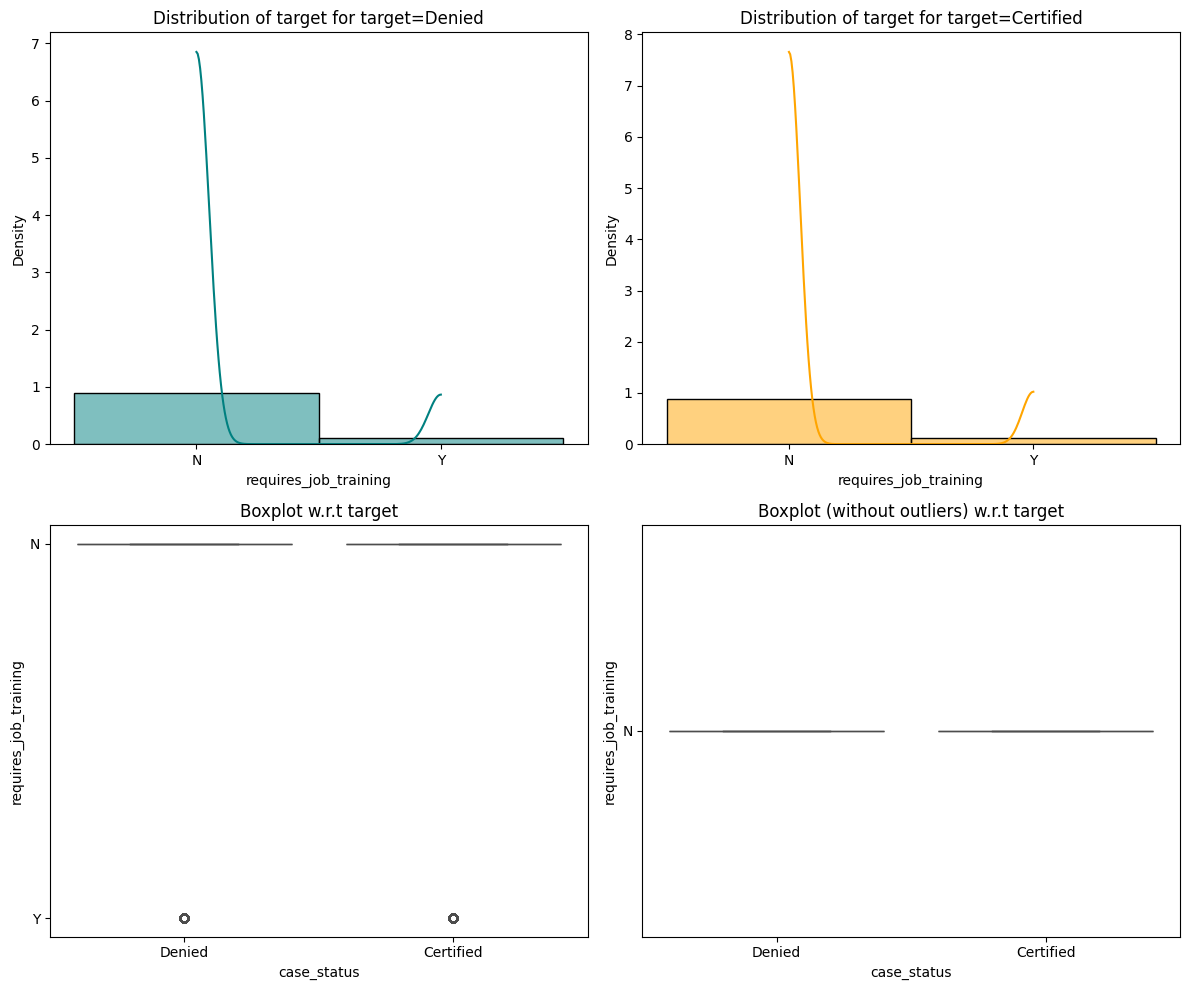

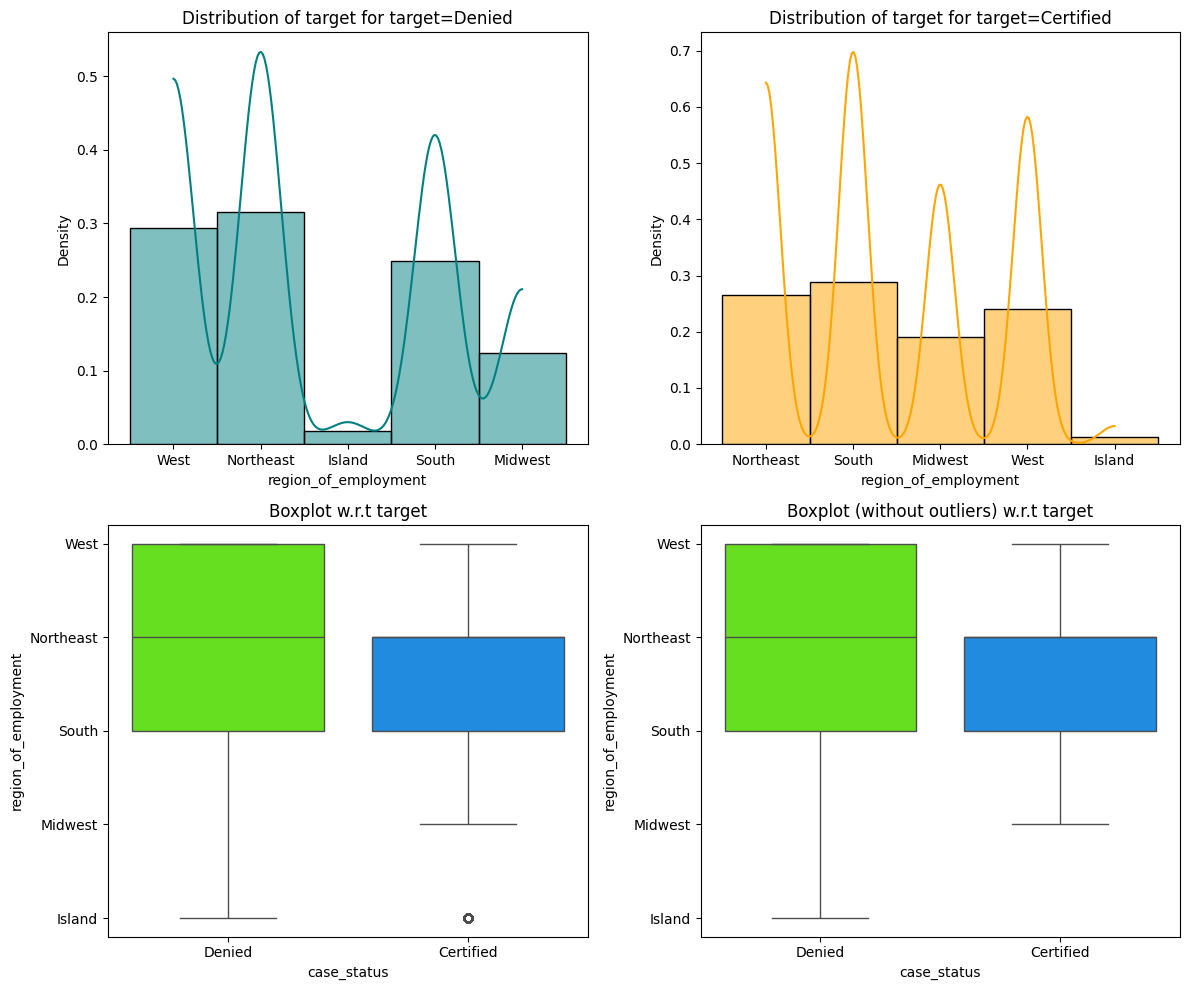

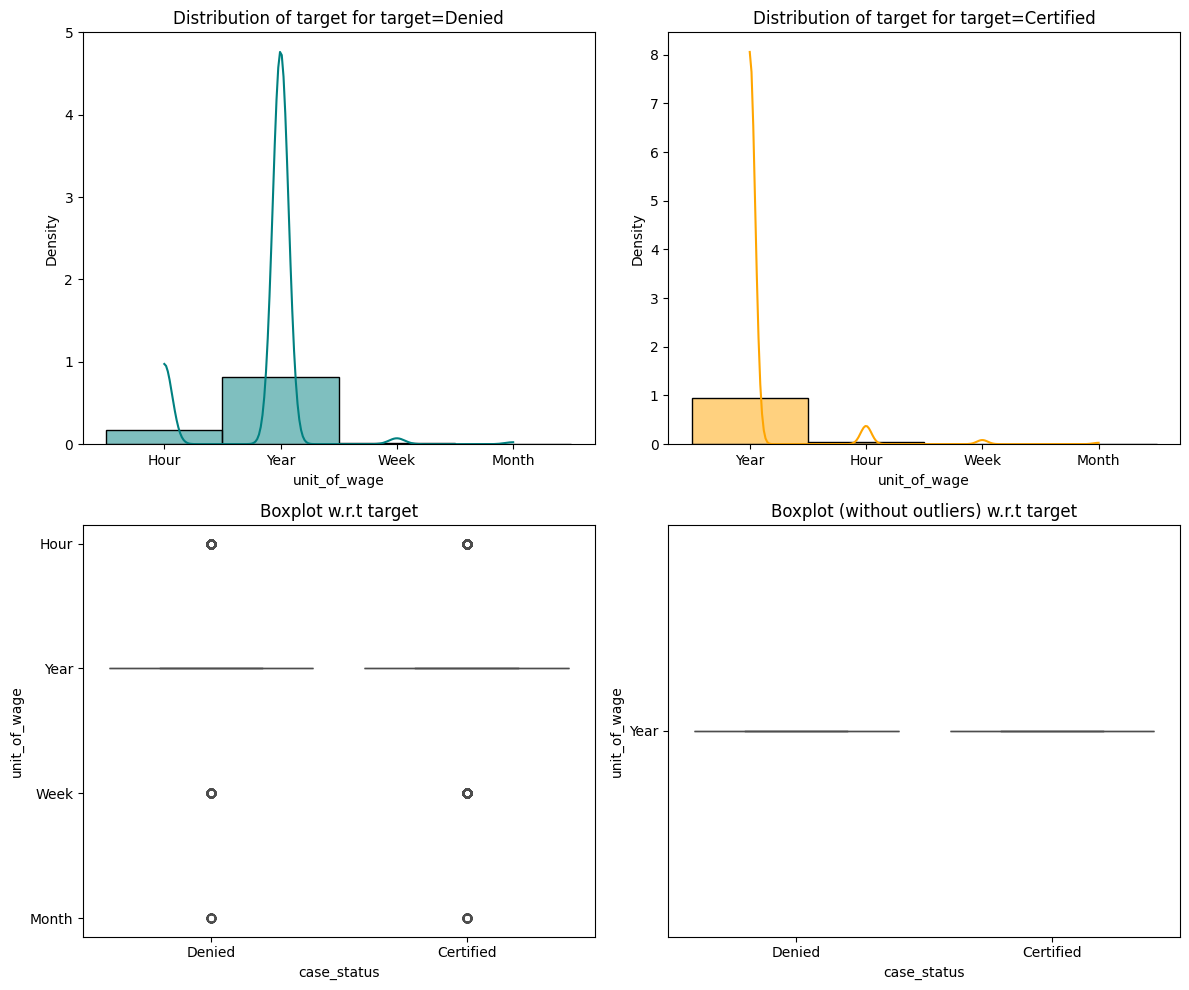

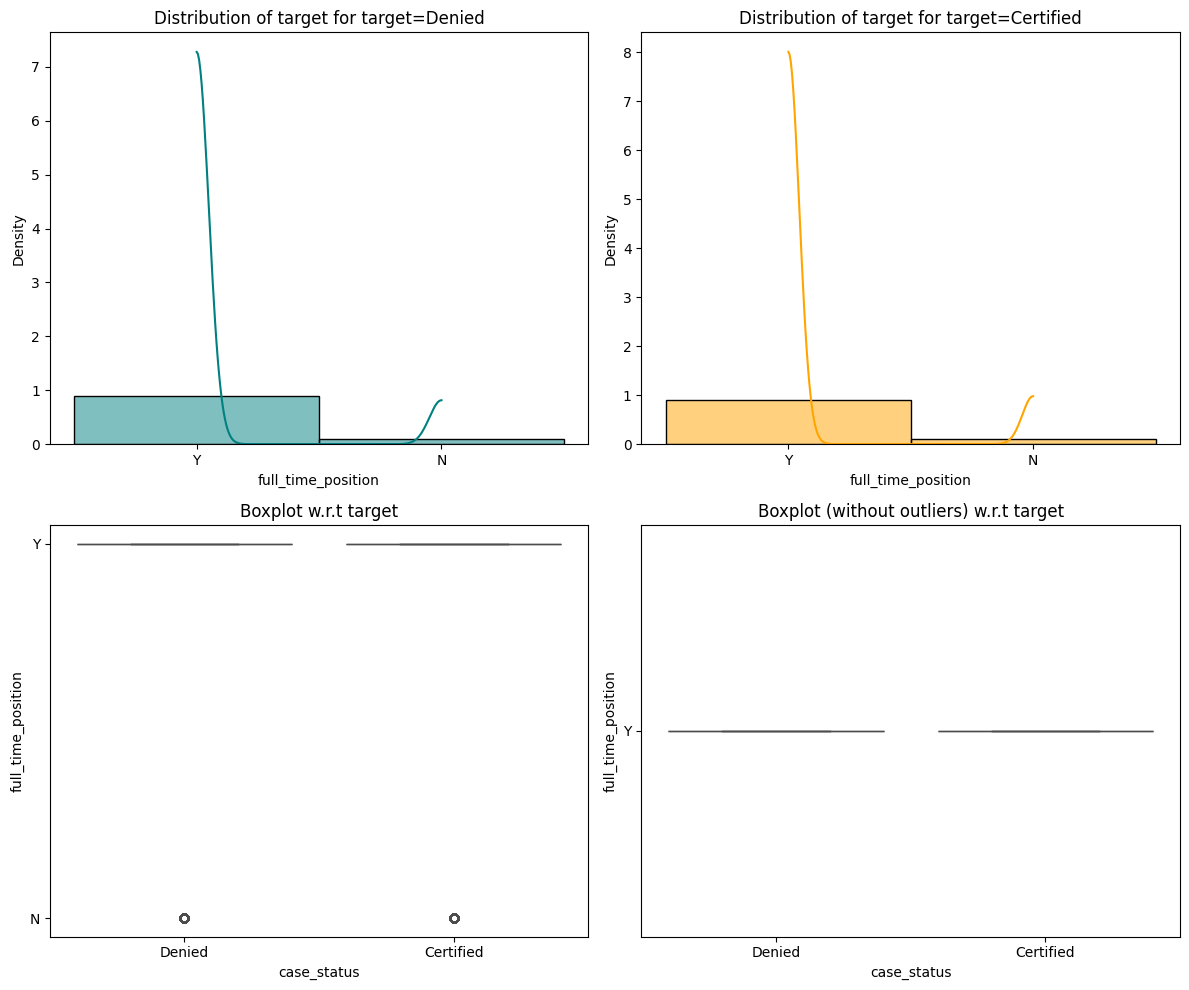

In [31]:
for i in categorical_cols:
  if i != target:
    distribution_plot_wrt_target(data, i, target)

**Observation:**
* Not much outstanding insights out of this, everything is distributed
* Lets do the cross analysis between numeric and object columns

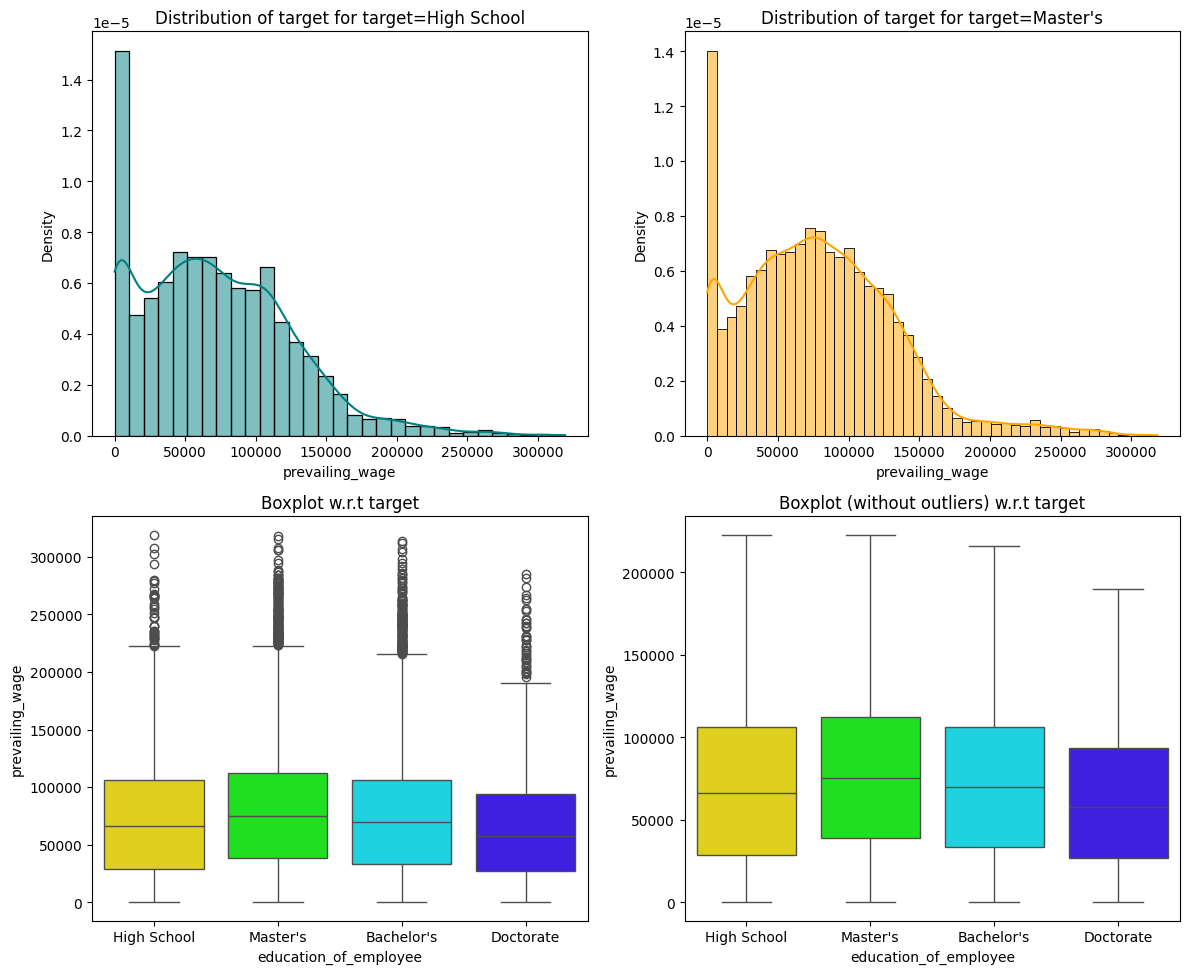

In [32]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'education_of_employee')

**Observation:**
* Surprisingly, doctorate holders show a lower median prevailing wage than high school graduates; we’ll examine whether differences in work experience or required on-the-job training explain this.
* Master’s and bachelor’s degree holders have very similar prevailing wages.
High school graduates earn slightly less than those with bachelor’s or master’s degrees.
* The dataset excludes certifications and specialized roles, which could influence prevailing wages for workers with only a high school diploma.

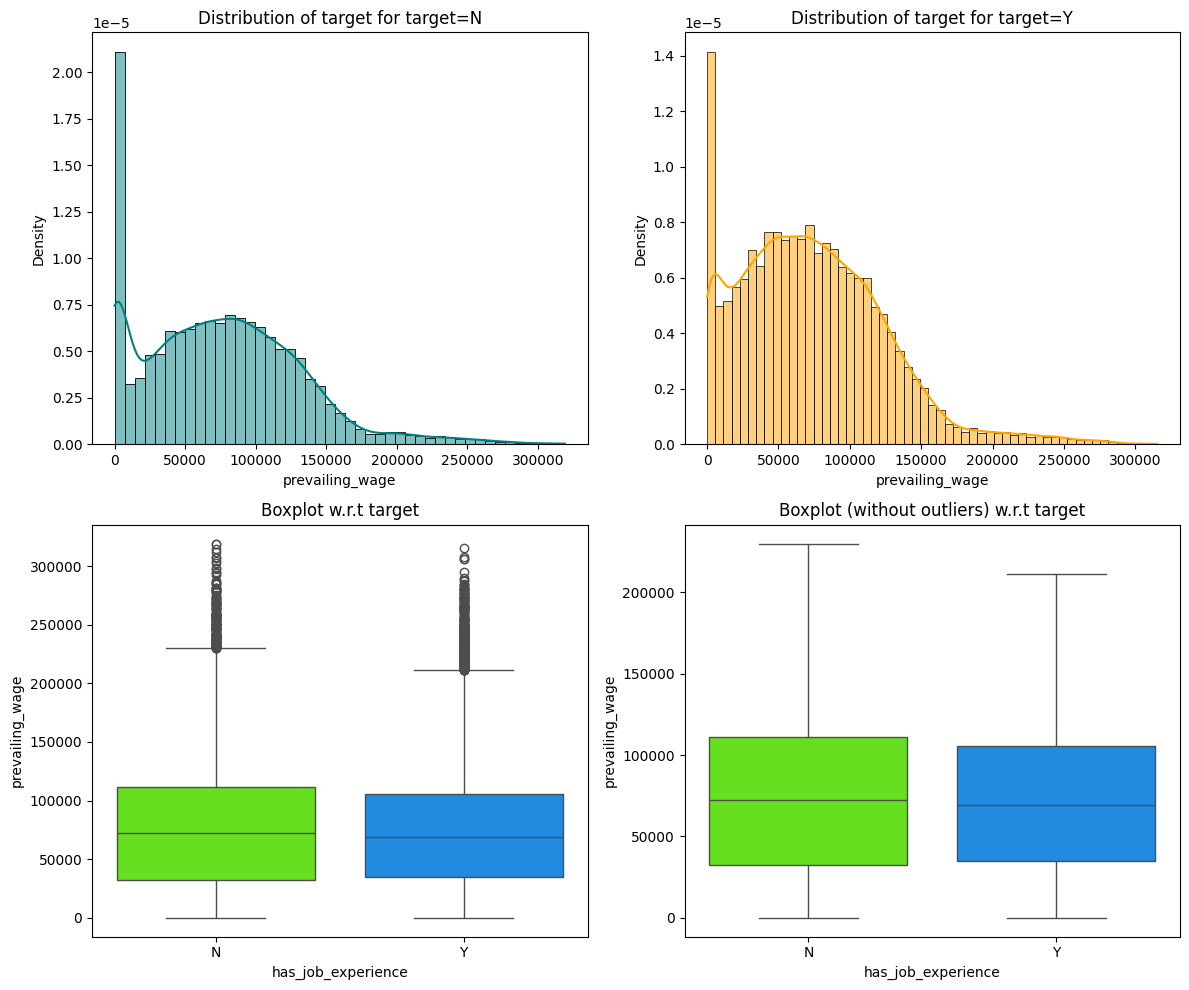

In [33]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'has_job_experience')

**Observation:**
* There seems to be a higher prevailing wage for workers with no work experience.

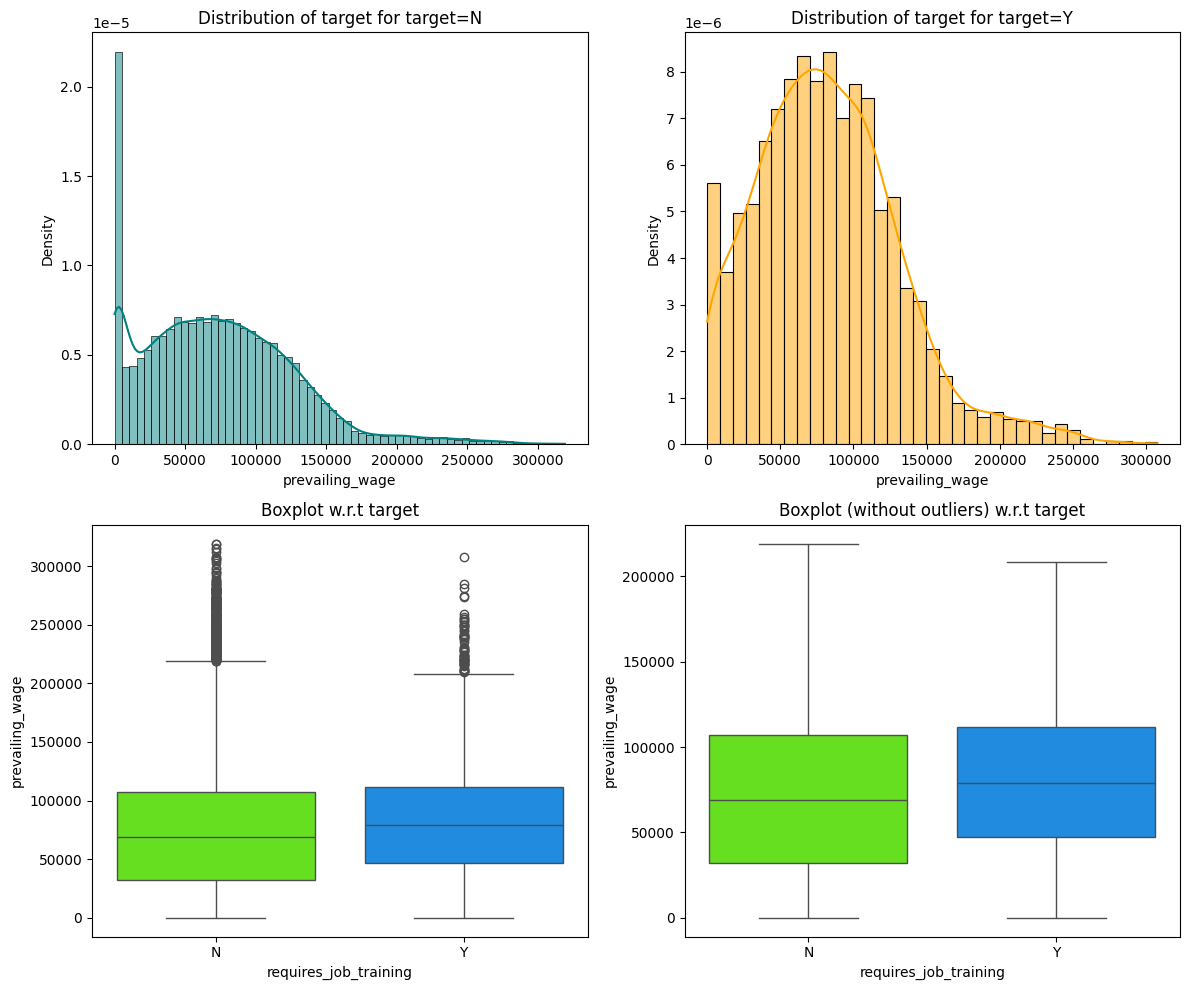

In [34]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'requires_job_training')

**Observation:**
* Workers that require job training have a slightly higher prevailing wage median.
* There are also less outliers for workers that require job training.
* This makes sense as job training especializes a worker more, having a higher value for the companies.

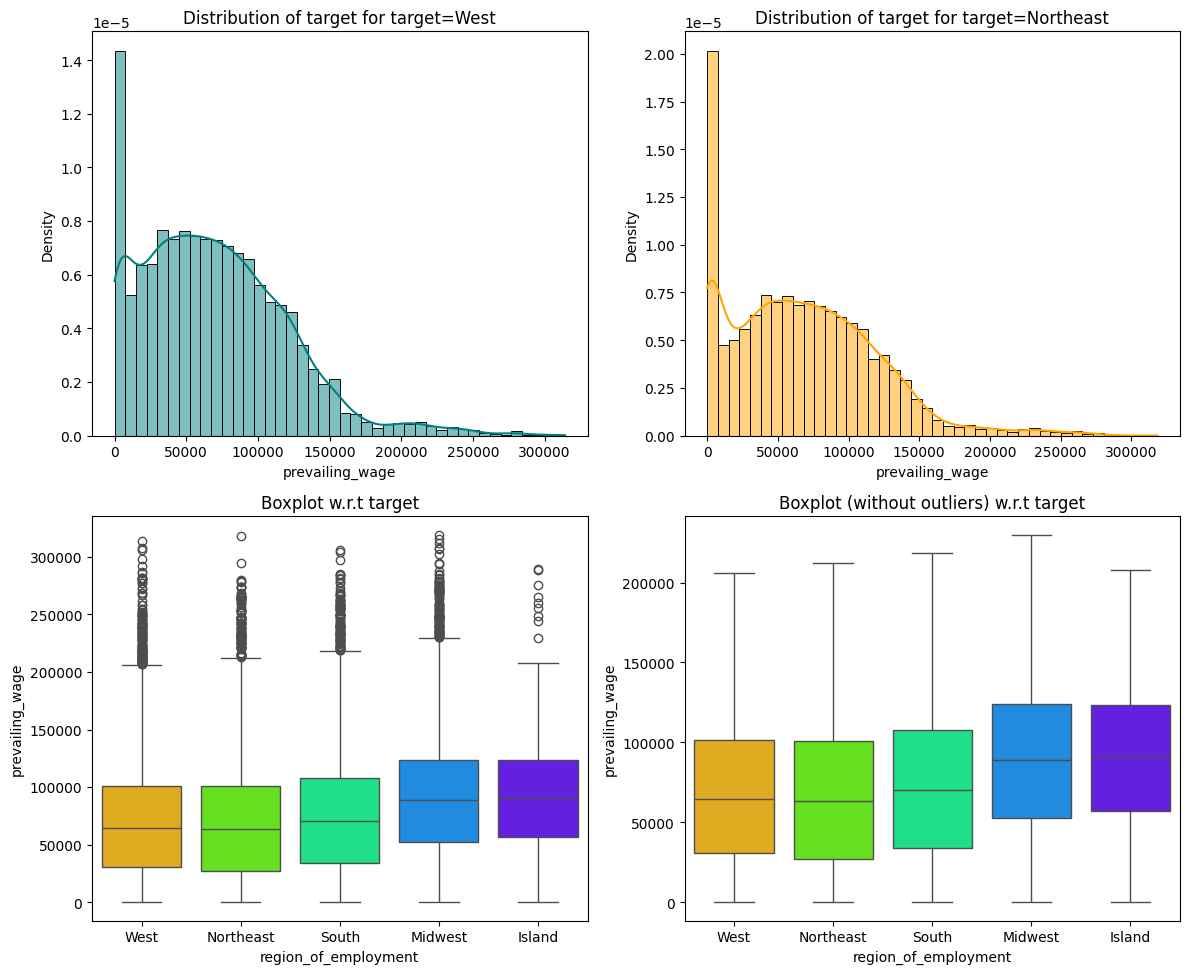

In [35]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'region_of_employment')

**Observation:**
* Midwest and inland have slightly higher median wages compared to other regions

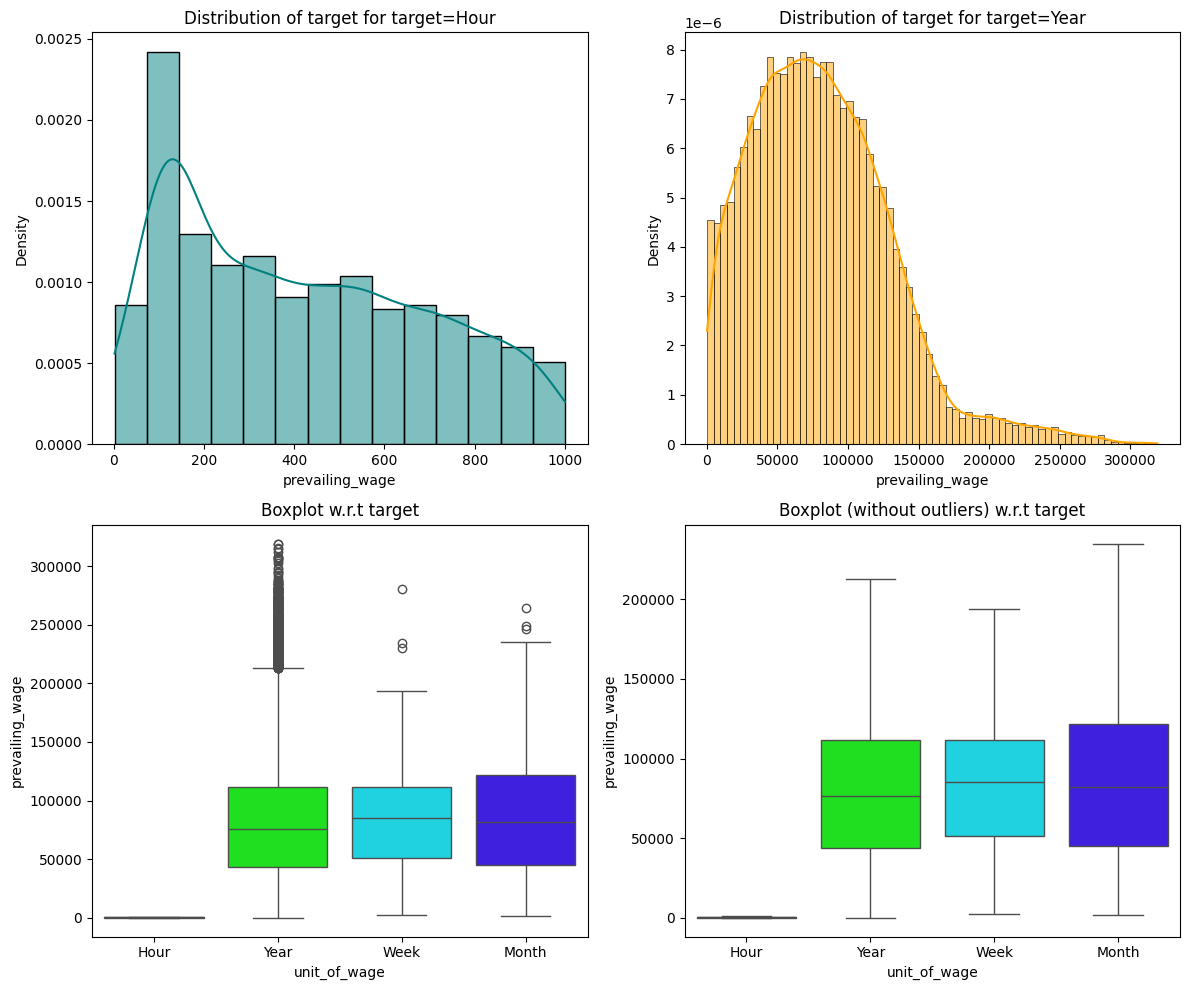

In [36]:
distribution_plot_wrt_target(data,'prevailing_wage', 'unit_of_wage')

**Observation:**
* It's surprising that all units of wage are close to 0.
* However, they are all above 0 which could be possible that the values are true.
* We will leave the prevailing wage as is since we don't know exactly how it was calculated. After comparing prevailing wage with other variables, it doesn't seem necessary to modify the variable.

## Outlier Detection

**Let's check for outliers in the data.**

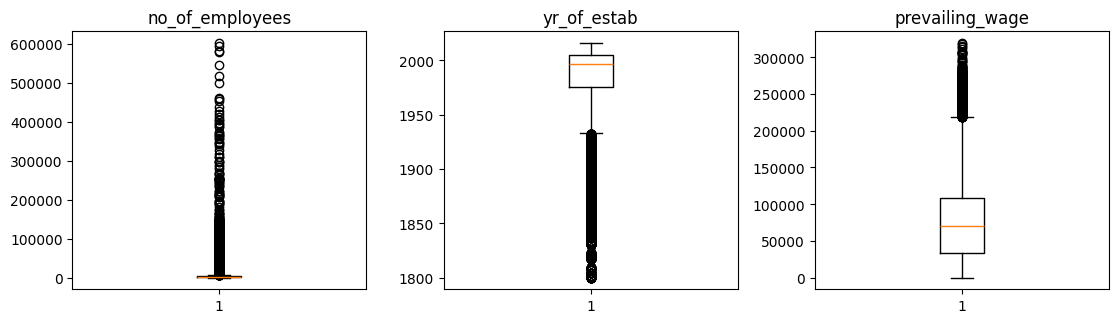

In [37]:
# outlier detection using boxplot

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* A lot of outliers on all the 3 numeric variables

## Data Preparation for Modeling

In [38]:
data[target] = data[target].apply(lambda x: 1 if x == "Certified" else 0)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [39]:
X = data.drop([target], axis=1)
Y = data[target]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

* Splitting the data into 70:30
* keeping Y stratified to keep the same distribution between train and test
* Random state is kept as 1

In [40]:
X_train.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
21,1706.0,2013.0,137694.98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7332,2321.0,2009.0,11641.40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
20579,1923.0,2005.0,21688.56,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
22326,434.0,1998.0,58341.54,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13237,5870.0,2011.0,140996.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [41]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


* Train - 17836
* Test - 7644
* Y is distributed equally between train and test

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Model predicted a visa to be denied but in reality the visa was certified (False Negative)
- Model predicted a visa to be certified but in reality it was denied. (False Positive)

**Which case is more important?**

- If we predict that a visa will be denied but in reality, it is certified, a more qualified US citizen will miss a job opportunity.
- If we predict that the visa will be certified but in reality, it is denied, a qualified foreign worker will miss a job opportunity.
- Both situations are equally important as they contribute to the national economy and business resources.

**How to reduce the losses?**

- Due to false negatives and false positives having a high cost for the economy. We need to look at a balance metric such as F1 score.
- We'll fit different models on the train data and observe their performance. - We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and F1 score to optimize the model.
- We will maximize F1 score by building different models. The greater the F1-Score higher the chances of predicting both the classes correctly.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest

In [44]:
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

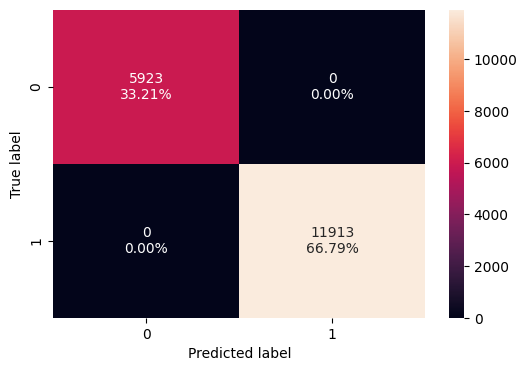

In [45]:
# confusion matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [46]:
# performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


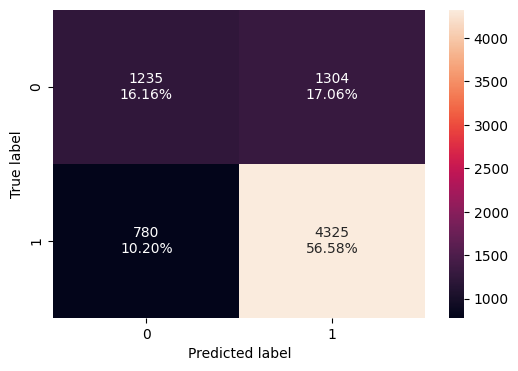

In [47]:
# confusion matrix for test data
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [48]:
## Let's check performance for test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


**Observation:**

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* Lets try tuning the algorithm with hyperparameter

### Hypertuning -- Random Forest

In [49]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(10), min_samples_split=7,
                       n_estimators=np.int64(20), oob_score=True,
                       random_state=1)

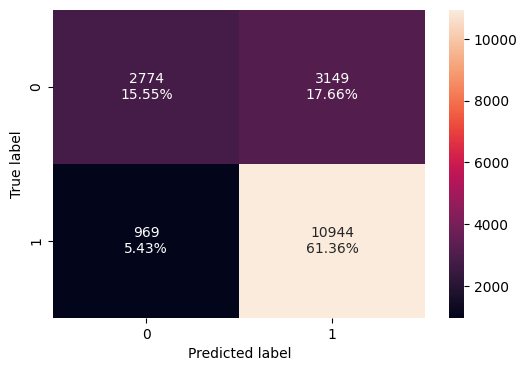

In [50]:
# confusion matrix for train data
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [51]:
# performance on train data
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


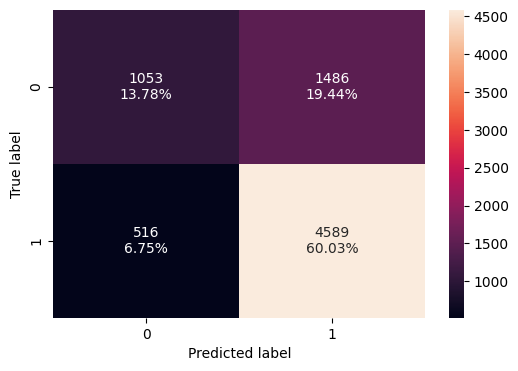

In [52]:
# confusion matrix for test data
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [53]:
## Let's check performance for test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

### Decision Tree (default)

In [54]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

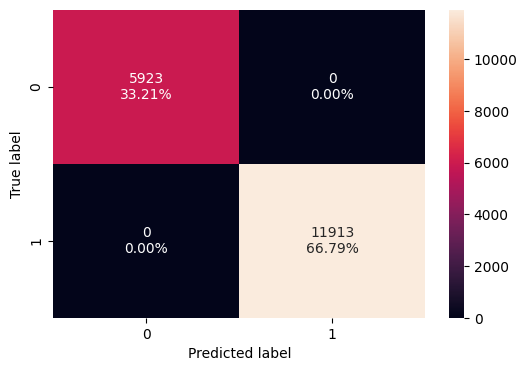

In [55]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [56]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


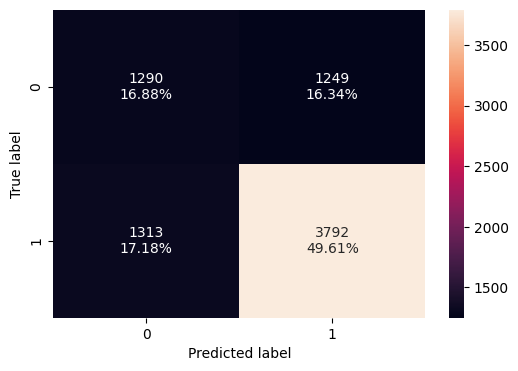

In [57]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [58]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


**Observation:**

* The basic decision tree is also overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* Test f1 score has not imrpoved as compared to previous models.
* Lets try tuning the algorithm with hyperparameter

### Hypertuning -- Decision Tree

In [59]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

## Run grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

## Code to fit the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(10),
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=3, random_state=1)

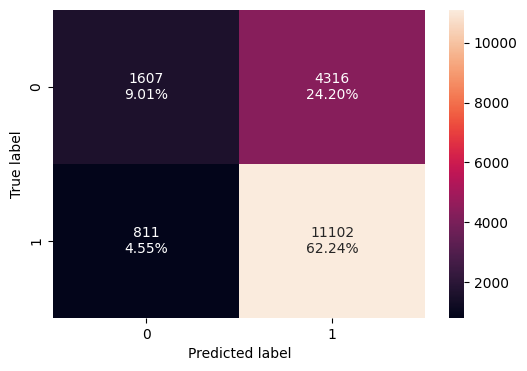

In [60]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [61]:
dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


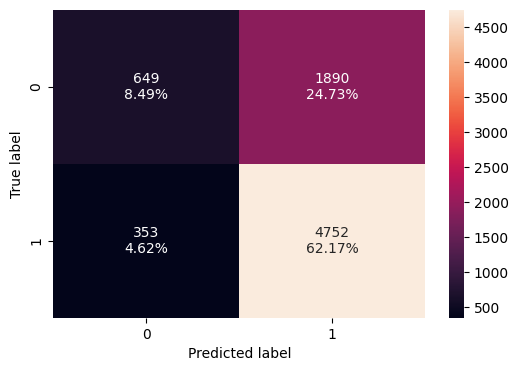

In [62]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [63]:
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


**Observation:**
* The metrics has improved and there is no overfitting observed but the performance of the model is slightly lesser than the previous model
* The difference between the train and test are minimal with F1 score as 81% in test

### Adabooster Classifier

In [64]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

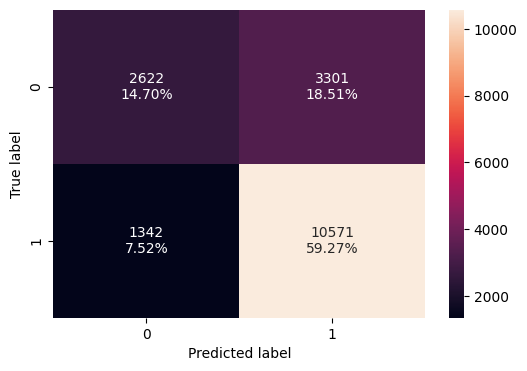

In [65]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [66]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.739684,0.88735,0.762039,0.819934


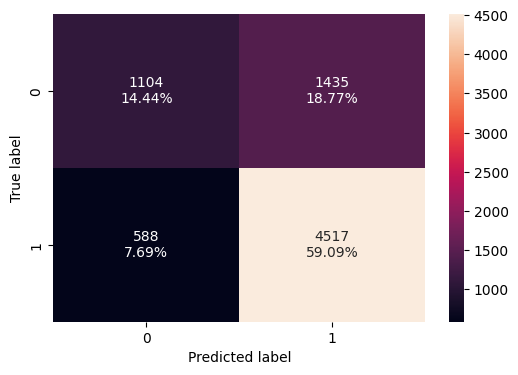

In [67]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [68]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.735348,0.884819,0.758905,0.817039


**Observation:**
* The model output is not overfitting even without tuning it and the performance is similar to the previous two model w.r.t f1 score
* The result looks promising, lets tune and see whether the F1 score is getting increased further

### Hypertuned -- Adabooster Classifier

In [69]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(0.1), n_estimators=np.int64(60),
                   random_state=1)

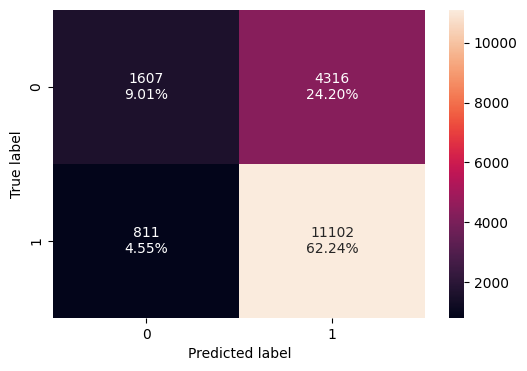

In [70]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [71]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


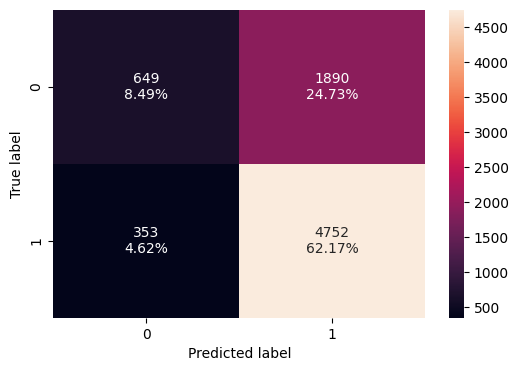

In [72]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [73]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


**Observation:**
* Its strange to see that the model slightly underperformed w.r.t f1 score when compared to the basic adaboost model
* But the output is more or less similar to the previous model outputs

### Gradient Boosting Classifier

In [74]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

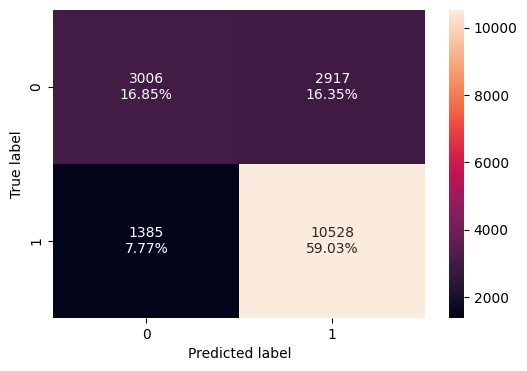

In [75]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [76]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


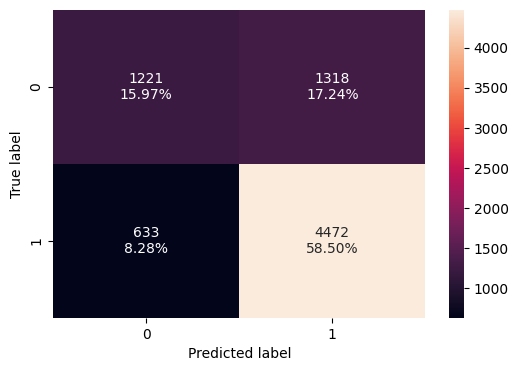

In [77]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [78]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


**Observation:**
* Here as well, the model performance better in terms of f1 score without tuning and performance slightly better than the other previous models
* Lets tune and see whether we are able to further increase the f1 score

### Hypertuned -- GB Classifier

In [79]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": [0.1, 0.21, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
## Complete the code to run grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)

## Let's fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

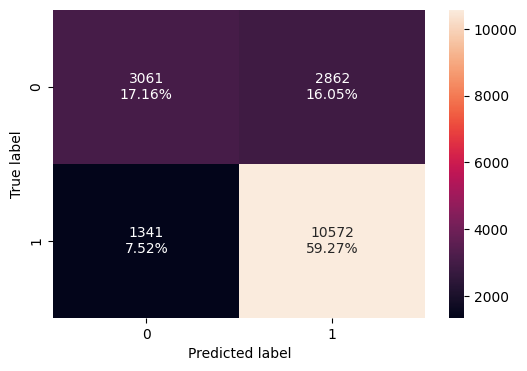

In [80]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [81]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764353,0.887434,0.786958,0.834182


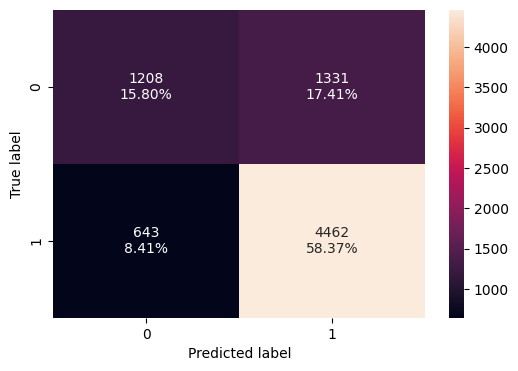

In [82]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [83]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741758,0.874045,0.77024,0.818866


**Observation:**
* The performance is same as the non-tuned model

### XGB Classifier

In [84]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

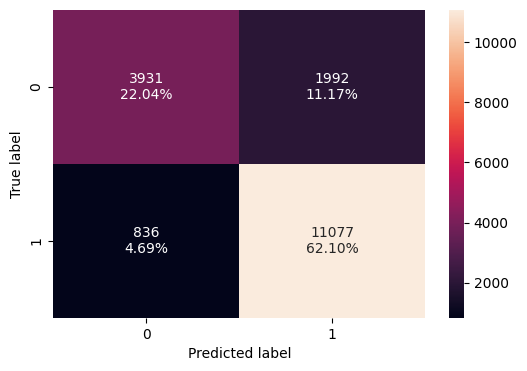

In [85]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [86]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.841444,0.929825,0.847578,0.886798


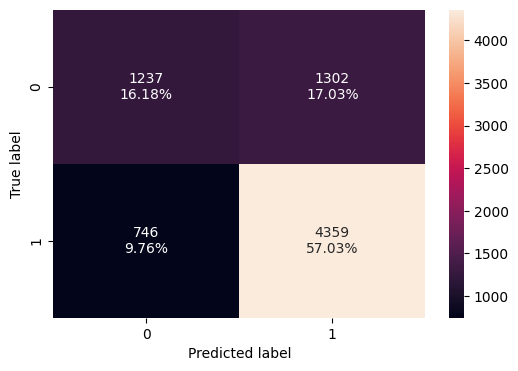

In [87]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [88]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732077,0.853869,0.770005,0.809772


**Observation:**
* Looks like the model is overfitting the values
* Lets tune and see to remove the overfitting

### Hypertuned -- XGB Classifier

In [90]:
# Base classifier
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=1,
    tree_method="hist"
)

# Hyperparameter grid
xgb_params = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.3, 0.1, 0.05],
    "max_depth": [3, 4, 6],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.5, 1.0]
}

# Scorer
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Grid search with 5-fold CV
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
xgb_grid.fit(X_train, y_train)

# Best model
xgb_tuned = xgb_grid.best_estimator_

# Fit the best estimator on full training data
xgb_tuned.fit(X_train, y_train)

# (Optional) Inspect best params and score
print("Best params:", xgb_grid.best_params_)
print("Best CV F1:", xgb_grid.best_score_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
Best CV F1: 0.8250713427685348


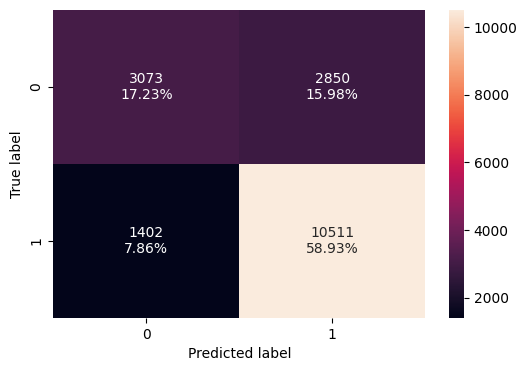

In [91]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [92]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.761606,0.882313,0.786693,0.831764


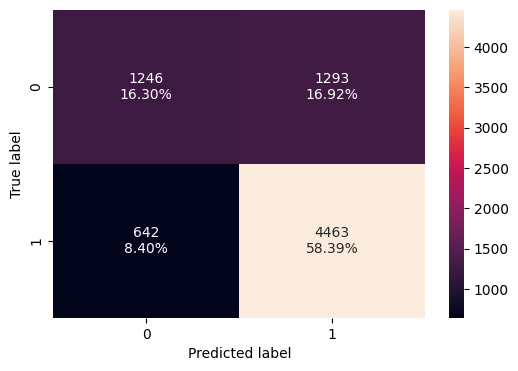

In [93]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [94]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732077,0.853869,0.770005,0.809772


**Observation:**
* The performance is same as the previous models, but the model took a lot of time to execute (~40mins)

### Bagging Classifier

In [95]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

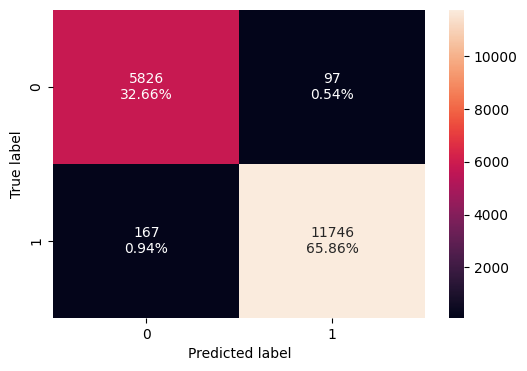

In [96]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [97]:
bagging_model_train_perf = model_performance_classification_sklearn(bagging,X_train,y_train)
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


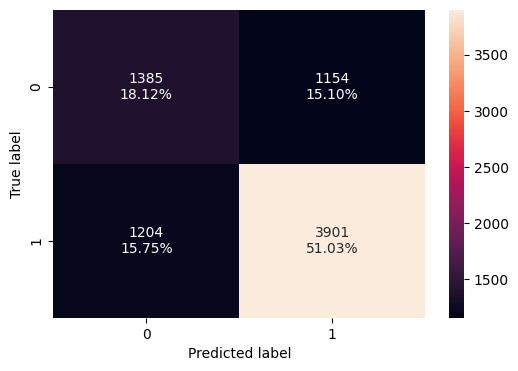

In [98]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [99]:
bagging_model_test_perf = model_performance_classification_sklearn(bagging,X_test,y_test)
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


**Observation:**
* Looks like the model is overfitting the values
* Lets tune and see to remove the overfitting

### Hypertuned -- Bagging Classifier

In [100]:
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

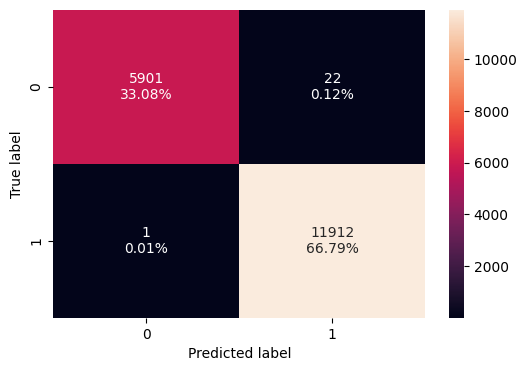

In [101]:
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [102]:
bagging_tuned_model_train_perf = model_performance_classification_sklearn(bagging_tuned,X_train,y_train)
bagging_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99871,0.999916,0.998157,0.999036


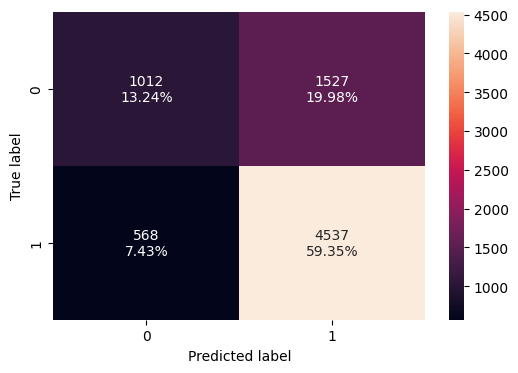

In [103]:
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [104]:
bagging_tuned_model_test_perf = model_performance_classification_sklearn(bagging_tuned,X_test,y_test)
bagging_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725929,0.888737,0.748186,0.812427


**Observation:**
* Even after tuning the model is overfitting. Hence, this model wont perform in the production data as it is not generalized

### Oversampling on all the model

In [112]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 



In [116]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset with oversampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_test, model.predict(X_test))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset with oversampled data:

Bagging: 0.7751514248380358
Random forest: 0.80405886019335
GBM: 0.8177777087698324
Adaboost: 0.8044847950693912
Xgboost: 0.8079623769044778
dtree: 0.74170801469327

Validation Performance:

Bagging: 0.7696862048549438
Random forest: 0.7992092629200791
GBM: 0.8194250627965393
Adaboost: 0.8024877497173012
Xgboost: 0.8066914498141264
dtree: 0.7441084053417125


**Observation:**
- The performance is not that great when compared to previous model execution. Even GBM is slightly similar or lesser

### Undersampling on all the model

In [117]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [118]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss",n_jobs=-1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset with undersampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_test, model.predict(X_test))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset with undersampled data:

Bagging: 0.6411413525524321
Random forest: 0.6875011408129813
GBM: 0.7131358906535971
Adaboost: 0.6949405744215158
Xgboost: 0.6944693136408734
dtree: 0.617022679979161

Validation Performance:

Bagging: 0.694059848146494
Random forest: 0.7357257632565614
GBM: 0.7615748031496063
Adaboost: 0.7619442429267281
Xgboost: 0.7433834427270802
dtree: 0.6842729330602565


**Observation:**
- Even undersampling performance drastically reduced. Not useful with the results obtained

## Comparison of Models and Final Model Selection

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        dtree_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XG Boost Classifier",
    "Tuned XG Boost Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
]

In [106]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        dtree_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XG Boost Classifier",
    "Tuned XG Boost Classifier",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
]

In [107]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XG Boost Classifier,Tuned XG Boost Classifier,Bagging Classifier,Tuned Bagging Classifier
Accuracy,1.0,0.712548,1.0,0.769119,0.739684,0.712548,0.758802,0.764353,0.841444,0.761606,0.985198,0.998710
Recall,1.0,0.931923,1.0,0.918660,0.887350,0.931923,0.883740,0.887434,0.929825,0.882313,0.985982,0.999916
Precision,1.0,0.720067,1.0,0.776556,0.762039,0.720067,0.783042,0.786958,0.847578,0.786693,0.991810,0.998157
F1,1.0,0.812411,1.0,0.841652,0.819934,0.812411,0.830349,0.834182,0.886798,0.831764,0.988887,0.999036


In [108]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XG Boost Classifier,Tuned XG Boost Classifier,Bagging Classifier,Tuned Bagging Classifier
Accuracy,0.664835,0.706567,0.727368,0.738095,0.735348,0.706567,0.744767,0.741758,0.732077,0.732077,0.691523,0.725929
Recall,0.742801,0.930852,0.847209,0.898923,0.884819,0.930852,0.876004,0.874045,0.853869,0.853869,0.764153,0.888737
Precision,0.752232,0.715447,0.768343,0.755391,0.758905,0.715447,0.772366,0.770240,0.770005,0.770005,0.771711,0.748186
F1,0.747487,0.809058,0.805851,0.820930,0.817039,0.809058,0.820927,0.818866,0.809772,0.809772,0.767913,0.812427


Observation:

- top 3 models are GBM, RF and Tuned GBM having similar f1 score
- GBM is good since the accuracy and precision also high when compared to other 2 models

### Feature importance

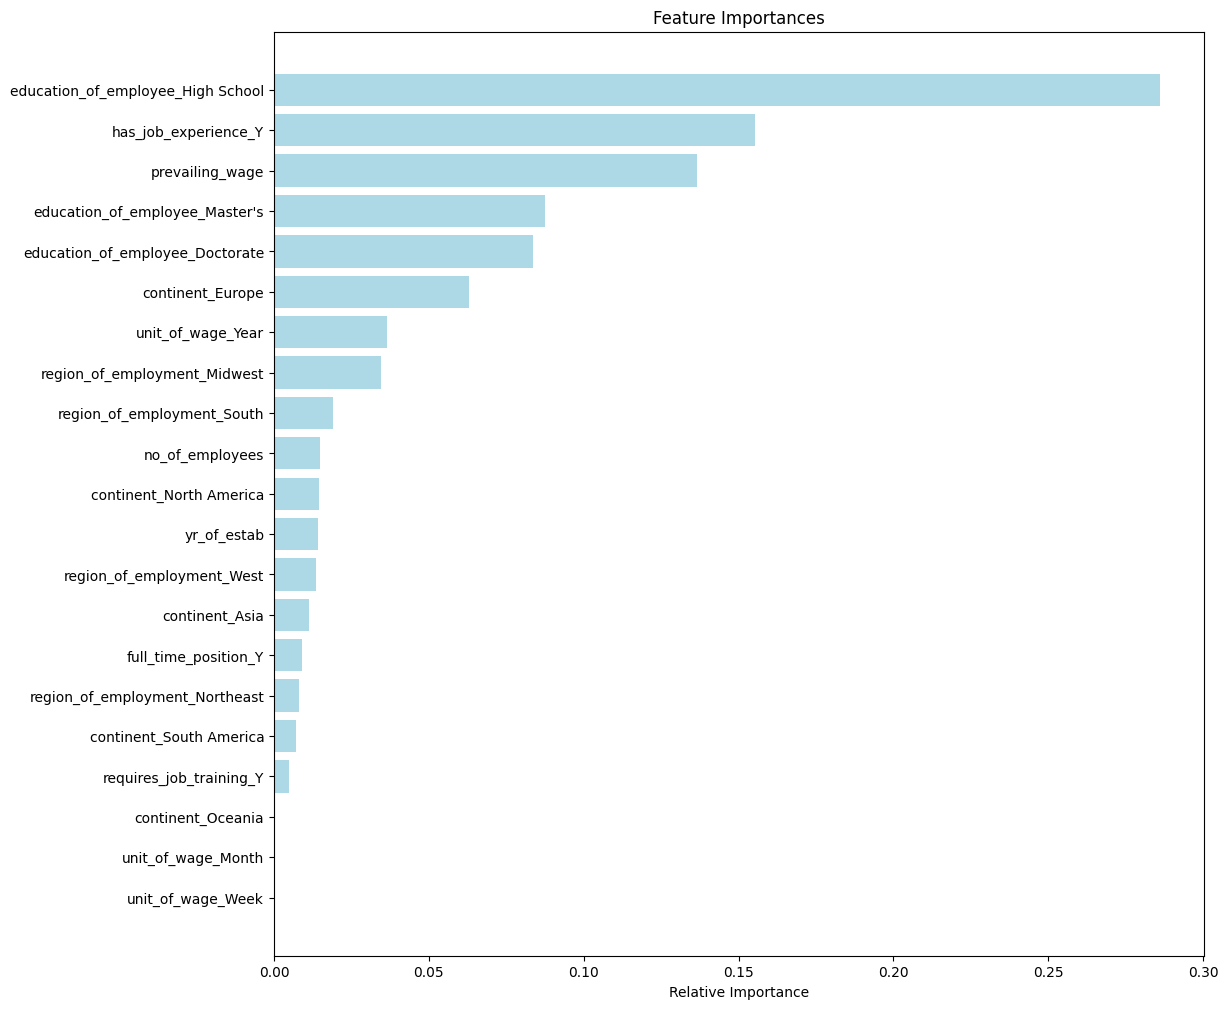

In [110]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

From the important features in the model

- the top three important features to look for while certifying a visa are: Education of the employee, Job experience, and Prevailing Wage.

## Conclusions

**Modeling approach:**
- We optimized models for F1 score to balance the costs of false positives (approving ineligible visas) and false negatives (rejecting eligible visas).
Several models performed similarly (0.82 F1). The Tuned Random Forest achieved the highest test F1 (0.8209), with the Gradient Boosting a close second (0.8209 F1). Both also performed well on other metrics, and Gradient Boosting remains a strong with high accuracy and precision and with interpretable choice.
- Oversampling performance was slightly near to the model with/without hyperparameter but not that great
- Undersampling performance was very bad when compared to all the models

**Key drivers (top features)**
- Indicator for high school education
- Job experience
- Master’s degree indicator
- Prevailing wage

**Applicant profiles**

*More likely to be certified*
- Education: Bachelor’s or higher (Master’s/Doctorate preferred)
- Experience: Has relevant job experience
- Wage: Higher prevailing wage, typically annual; median among certified ≈ $72k
- Region: Higher certification rates observed for Europe, North America, and Asia

*More likely to be denied*
- Education: High school only
- Experience: No job experience
- Wage: Lower and/or hourly wages; median around $65k for the denied group
- Region: Higher denial rates observed for South America, Africa, and Oceania

#Recommendations

Using approval rates and model feature importance, officials could adopt a tiered screening process:

- Prioritize by education level (doctorate → master’s → bachelor’s → high school).
- Segment by relevant work experience, since experienced applicants are likelier to be certified.
- Rank by prevailing wage; higher wages correlate with higher approval likelihood as we observed in EDA
- In this framework, promptly triage and discard applications with a high predicted probability of denial.
- For deeper analysis, segment applications by job sector and experience level.

Further Improvement areas:

- Consider adding applicant age and gender as a feature; it may be more informative than employer year of establishment.
- Also, lets consider one feature of which all countries all the applicants already had the visa previously, as this will help us to build a strong case of less scrutiny and will help with the faster approvals (assuming that previous visa providers have done the due dilligence)